> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset (Football Dataset)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables.
>
> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. If you're not sure what questions to ask right now, then make sure you familiarize yourself with the variables and the dataset context for ideas of what to explore.

I have selected <b>European Soccer Database</b> by <b>Hugo Mathein</b> on *Kaggle*. European Soccer or more commonly and widely used term **Football** is a sport I am actually interested in. I have keen interest in this sport and thus, I chose to go ahead with this dataset.

Now coming to actual data points of this set, it has following features:
<ol>
<li>+25,000 matches</li>
    <li>+10,000 players</li>
    <li>11 European Countries with their lead championship</li>
    <li>Seasons 2008 to 2016</li>
    <li>Players and Teams' attributes* sourced from EA Sports' FIFA video game series, including the weekly updates</li>
    <li>Team line up with squad formation (X, Y coordinates)</li>
    <li>Betting odds from up to 10 providers</li>
    <li>Detailed match events (goal types, possession, corner, cross, fouls, cards etc...) for +10,000 matches</li>
    <li>Table containing teams' attributes from FIFA !</li>
</ol>    

*To be noted - This dataset contains incomplete values too!*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3 as sq3
from scipy import stats
import pylab as pl
import matplotlib.patches as mpatches

% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [2]:
# Loading the dataset

conn = sq3.connect("database.sqlite")

In [3]:
# Listing the tables in sqlite database

tables = pd.read_sql("SELECT * FROM sqlite_master WHERE type='table';", conn)

tables

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,4,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,Player_Attributes,Player_Attributes,11,"CREATE TABLE ""Player_Attributes"" (\n\t`id`\tIN..."
2,table,Player,Player,14,CREATE TABLE `Player` (\n\t`id`\tINTEGER PRIMA...
3,table,Match,Match,18,CREATE TABLE `Match` (\n\t`id`\tINTEGER PRIMAR...
4,table,League,League,24,CREATE TABLE `League` (\n\t`id`\tINTEGER PRIMA...
5,table,Country,Country,26,CREATE TABLE `Country` (\n\t`id`\tINTEGER PRIM...
6,table,Team,Team,29,"CREATE TABLE ""Team"" (\n\t`id`\tINTEGER PRIMARY..."
7,table,Team_Attributes,Team_Attributes,2,CREATE TABLE `Team_Attributes` (\n\t`id`\tINTE...


Let's save each table in a respective dataframe - just so we can proceed with Analysis easily!

We'll skip the above process for **sqlite_sequence** which contains the list of all the other tables along with their sequences.

In [4]:
# df_player_attr = pd.read_sql("SELECT * FROM Player_Attributes;", conn)
# df_player = pd.read_sql("SELECT * FROM Player;", conn)
# df_match = pd.read_sql("SELECT * FROM Match;", conn)
# df_league = pd.read_sql("SELECT * FROM League;", conn)
df_country = pd.read_sql("SELECT * FROM Country;", conn)
# df_team = pd.read_sql("SELECT * FROM Team;", conn)
# df_team_attr = pd.read_sql("SELECT * FROM Team_Attributes;", conn)

Now let's go through some stats of each table

In [5]:
# checking the results of df_country

df_country

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy
5,13274,Netherlands
6,15722,Poland
7,17642,Portugal
8,19694,Scotland
9,21518,Spain


Not much statistics can be inferred from this table. Although it does tell us one very important fact about our dataset. The fact, that we have dataset available for 11 countries and their respective Leagues.

Now we'll see what Leagues (of each country) are available.

In [6]:
# reading query based on JOIN of Country and League and then loading it in df_league

df_league = pd.read_sql("SELECT Country.id, Country.name AS Country, League.name AS League FROM Country JOIN League ON Country.id = League.country_id;", conn)

df_league

,id,Country,League
0,1,Belgium,Belgium Jupiler League
1,1729,England,England Premier League
2,4769,France,France Ligue 1
3,7809,Germany,Germany 1. Bundesliga
4,10257,Italy,Italy Serie A
5,13274,Netherlands,Netherlands Eredivisie
6,15722,Poland,Poland Ekstraklasa
7,17642,Portugal,Portugal Liga ZON Sagres
8,19694,Scotland,Scotland Premier League
9,21518,Spain,Spain LIGA BBVA


The Leagues in Germany, England, France, Italy and Spain are considered to be the top 5 European Football Leagues. So, we'll first take a sample from one of these leagues and see how our data in actually distributed.

In [7]:
# reading query based on JOIN of Country and League and Match

pd.read_sql("SELECT Country.id, Country.name AS Country, League.name AS League, Match.* FROM Country JOIN League ON Country.id = League.country_id JOIN Match ON Match.league_id = League.id;", conn).head()

,id,Country,League,id,country_id,league_id,season,stage,date,match_api_id,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,Belgium,Belgium Jupiler League,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,1,Belgium,Belgium Jupiler League,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,1,Belgium,Belgium Jupiler League,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,1,Belgium,Belgium Jupiler League,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,1,Belgium,Belgium Jupiler League,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67


**Match** table alone has 115 columns and probably contributed to the maximum possible statistics. We will now save this in a dataframe and perform relevant operations to get details of the columns.

In [8]:
# reading query based on JOIN of Country and League and Match, and then loading it in df_match

df_match = pd.read_sql("SELECT Country.id, Country.name AS Country, League.name AS League, t.team_long_name AS home_team, t_away.team_long_name AS away_team, Match.* FROM Country JOIN League ON Country.id = League.country_id JOIN Match ON Match.league_id = League.id JOIN Team t ON Match.home_team_api_id = t.team_api_id JOIN Team t_away ON Match.away_team_api_id = t_away.team_api_id;", conn)

df_match.head()

,id,Country,League,home_team,away_team,id,country_id,league_id,season,stage,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,Belgium,Belgium Jupiler League,KRC Genk,Beerschot AC,1,1,1,2008/2009,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,1,Belgium,Belgium Jupiler League,SV Zulte-Waregem,Sporting Lokeren,2,1,1,2008/2009,1,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,1,Belgium,Belgium Jupiler League,KSV Cercle Brugge,RSC Anderlecht,3,1,1,2008/2009,1,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,1,Belgium,Belgium Jupiler League,KAA Gent,RAEC Mons,4,1,1,2008/2009,1,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,1,Belgium,Belgium Jupiler League,FCV Dender EH,Standard de Liège,5,1,1,2008/2009,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67


In [9]:
# Checking the structure of dataframe - df_match

df_match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Columns: 120 entries, id to BSA
dtypes: float64(96), int64(10), object(14)
memory usage: 23.8+ MB


In [10]:
# Checking the description of dataframe - df_match

df_match.describe()

,id,id,country_id,league_id,stage,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
count,25979.000000,25979.000000,25979.000000,25979.000000,25979.000000,2.597900e+04,25979.000000,25979.000000,25979.000000,25979.000000,...,17097.000000,22568.000000,22568.000000,22568.000000,14162.000000,14162.000000,14162.000000,14161.000000,14161.000000,14161.000000
mean,11738.630317,12990.000000,11738.630317,11738.630317,18.242773,1.195429e+06,9984.371993,9984.475115,1.544594,1.160938,...,4.622343,2.668107,3.899048,4.840281,2.498764,3.648189,4.353097,2.497894,3.660742,4.405663
std,7553.936759,7499.635658,7553.936759,7553.936759,10.407354,4.946279e+05,14087.453758,14087.445135,1.297158,1.142110,...,3.632164,1.928753,1.248221,4.318338,1.489299,0.867440,3.010189,1.507793,0.868272,3.189814
min,1.000000,1.000000,1.000000,1.000000,1.000000,4.831290e+05,1601.000000,1601.000000,0.000000,0.000000,...,1.100000,1.030000,1.620000,1.080000,1.050000,1.450000,1.120000,1.040000,1.330000,1.120000
25%,4769.000000,6495.500000,4769.000000,4769.000000,9.000000,7.684365e+05,8475.000000,8475.000000,1.000000,0.000000,...,2.500000,1.700000,3.300000,2.550000,1.670000,3.200000,2.500000,1.670000,3.250000,2.500000
50%,10257.000000,12990.000000,10257.000000,10257.000000,18.000000,1.147511e+06,8697.000000,8697.000000,1.000000,1.000000,...,3.500000,2.150000,3.500000,3.500000,2.100000,3.300000,3.400000,2.100000,3.400000,3.400000
75%,17642.000000,19484.500000,17642.000000,17642.000000,27.000000,1.709852e+06,9925.000000,9925.000000,2.000000,2.000000,...,5.250000,2.800000,4.000000,5.400000,2.650000,3.750000,5.000000,2.620000,3.750000,5.000000
max,24558.000000,25979.000000,24558.000000,24558.000000,38.000000,2.216672e+06,274581.000000,274581.000000,10.000000,9.000000,...,41.000000,36.000000,26.000000,67.000000,21.000000,11.000000,34.000000,17.000000,13.000000,34.000000


A few of these statistics (*like id and api_id*) are actually not helpful since they are only indentifiers rather than actual numeric data.

Though, on the other hand, statistics like Betting WIN/LOSS ratio or Winning Odds and Goal Scoring data speak a lot about this data.

We will, for now, check other tables too. 

Let us se what attributes does the Table **Player** and **Player Attributes** have in their arsenal.

In [11]:
# Loading Player table (sqlite) into df_player

df_player = pd.read_sql("SELECT * FROM Player", conn)

df_player.head()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154


We can notice that player's attributes are actually linked via **player_fifa_api_id**.
So let's us JOIN the 2 tables and then looks on for some attributes for statistics.

In [12]:
# Loading the JOIN of Player_Attributes and Player into df_player_attr

df_player_attr = pd.read_sql("SELECT p.player_name, p.birthday, p.height, p.weight , pl.* FROM Player p JOIN Player_Attributes pl ON p.player_fifa_api_id = pl.player_fifa_api_id", conn)

df_player_attr.head()

,player_name,birthday,height,weight,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [13]:
# Checking the structure of df_player_attr

df_player_attr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183929 entries, 0 to 183928
Data columns (total 46 columns):
player_name            183929 non-null object
birthday               183929 non-null object
height                 183929 non-null float64
weight                 183929 non-null int64
id                     183929 non-null int64
player_fifa_api_id     183929 non-null int64
player_api_id          183929 non-null int64
date                   183929 non-null object
overall_rating         183142 non-null float64
potential              183142 non-null float64
preferred_foot         183142 non-null object
attacking_work_rate    180748 non-null object
defensive_work_rate    183142 non-null object
crossing               183142 non-null float64
finishing              183142 non-null float64
heading_accuracy       183142 non-null float64
short_passing          183142 non-null float64
volleys                181265 non-null float64
dribbling              183142 non-null float64
curve     

In [14]:
# Checking the attribute - attacking_work_rate
# This is being done in order to check the null values and see if it's suitable to use

df_player_attr.attacking_work_rate.value_counts()

medium    125070
high       42823
low         8569
None        3639
norm         348
y            106
le           104
stoc          89
Name: attacking_work_rate, dtype: int64

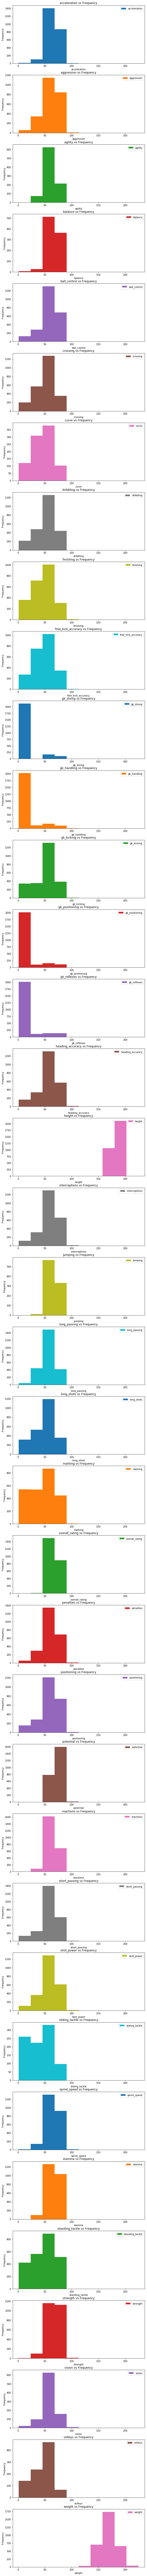

In [15]:
# Constructing histogram of all the variables/attributes in df_player_attr

#df_player_attr[df_player_attr.attacking_work_rate.isnull()].hist(figsize=(20,20))

df_player_attr_plot = df_player_attr[df_player_attr.attacking_work_rate.isnull()].loc[
    :, df_player_attr.columns.difference(['id', 'player_fifa_api_id', 'player_api_id'])]

axes = df_player_attr_plot.plot(kind='hist', subplots=True, sharex=False, sharey=False, figsize=(10,200), legend=True,
                               title=list(df_player_attr_plot.add_suffix(' vs Frequency').select_dtypes(['int64', 'float64'])));

x_label = list(df_player_attr_plot.select_dtypes(['int64', 'float64']))

for i in range(len(axes)):
    axes[i].set_xlabel(x_label[i])

Let's check the actual data as well, as we see a relation between overall potential of the players and other positions.

In [16]:
# Determining relation between potentital and other attributes

df_player_attr[df_player_attr.attacking_work_rate.isnull()][['birthday', 'date', 'overall_rating', 'potential', 'defensive_work_rate']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3181 entries, 373 to 183918
Data columns (total 5 columns):
birthday               3181 non-null object
date                   3181 non-null object
overall_rating         2394 non-null float64
potential              2394 non-null float64
defensive_work_rate    2394 non-null object
dtypes: float64(2), object(3)
memory usage: 149.1+ KB


In [17]:
# Describing df_player_attr based on specific condition mentioned in previous block

df_player_attr[df_player_attr.attacking_work_rate.isnull()][['birthday', 'date', 'overall_rating', 'potential', 'defensive_work_rate']].describe()

,overall_rating,potential
count,2394.000000,2394.000000
mean,66.248120,72.223893
std,7.493154,7.113550
min,41.000000,47.000000
25%,61.000000,67.000000
50%,66.000000,72.000000
75%,71.000000,77.000000
max,91.000000,92.000000


Based on above histograms and statistics, few things can be inferred

<ol>
<li>Most of the players with no mentioned attacking_work_rate lie in the range of 60-80</li>
<li>A lot of the players with no mentioned attacking_work_rate have a lot of missing values. This could be because of the fact that the players have retired and FIFA does not use their data in the game any more or maybe the players are too young to have any data on them.</li>
</ol>

Now, we shall see the similar results for the Team Attributes

In [18]:
# Loading the JOIN of Team and Team_Attributes in df_team_attributes

df_team_attributes = pd.read_sql("SELECT t.team_long_name, t.team_short_name, tm.* FROM Team t JOIN Team_Attributes tm ON t.team_fifa_api_id = tm.team_fifa_api_id", conn)

df_team_attributes

,team_long_name,team_short_name,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,KRC Genk,GEN,485,673,9987,2010-02-22 00:00:00,45,Balanced,NaN,Little,...,60,Normal,Organised,70,High,65,Press,70,Wide,Cover
1,KRC Genk,GEN,486,673,9987,2011-02-22 00:00:00,66,Balanced,NaN,Little,...,51,Normal,Organised,48,Medium,47,Press,54,Normal,Offside Trap
2,KRC Genk,GEN,487,673,9987,2012-02-22 00:00:00,53,Balanced,NaN,Little,...,56,Normal,Organised,47,Medium,45,Press,55,Normal,Cover
3,KRC Genk,GEN,488,673,9987,2013-09-20 00:00:00,58,Balanced,NaN,Little,...,56,Normal,Organised,47,Medium,45,Press,55,Normal,Cover
4,KRC Genk,GEN,489,673,9987,2014-09-19 00:00:00,58,Balanced,52.0,Normal,...,56,Normal,Organised,47,Medium,45,Press,55,Normal,Cover
5,KRC Genk,GEN,490,673,9987,2015-09-10 00:00:00,58,Balanced,52.0,Normal,...,56,Normal,Organised,36,Medium,57,Press,70,Wide,Cover
6,Beerschot AC,BAC,149,675,9993,2010-02-22 00:00:00,35,Balanced,NaN,Little,...,50,Normal,Organised,70,High,70,Double,70,Wide,Cover
7,Beerschot AC,BAC,150,675,9993,2011-02-22 00:00:00,47,Balanced,NaN,Little,...,67,Lots,Organised,33,Deep,34,Press,48,Normal,Offside Trap
8,Beerschot AC,BAC,151,675,9993,2012-02-22 00:00:00,55,Balanced,NaN,Little,...,49,Normal,Organised,45,Medium,46,Press,50,Normal,Cover
9,Beerschot AC,BAC,152,675,9993,2013-09-20 00:00:00,47,Balanced,NaN,Little,...,49,Normal,Organised,45,Medium,46,Press,67,Wide,Cover


A lot of Teams (mostly in lower Leagues) do not have all the statistics available. Also, this data is collected for various instances of a single Team ranging from years 2010 to 2015. A few do not have that either, with only 2-3 years of data ranging someone where in between the above range. This could be because those teams were not playing that season in the League. They could have been playing in the lower leagues, thus, not status is available for that period for those teams.

One conclusion can be made based on the above statement that FIFA records (in the given dataset) for the teams were not available prior to the year 2010. This rules out complete information of all the teams, while still containing several important pieces of information, for the League years of 2008/09 and 2009/10.

Now let's categorize the same with their Country and League

In [19]:
# Adding a dummy column - start_date
# start_date is a combination of 'year' from match date and team_long_name - used as a compound primary key

df_team_attributes = pd.read_sql("SELECT t.team_long_name, t.team_short_name, tm.* FROM Team t JOIN Team_Attributes tm ON t.team_fifa_api_id = tm.team_fifa_api_id", conn)
df_team_attributes['start_date'] = df_team_attributes.date.str[0:4] + df_team_attributes.team_long_name
df_team_attributes.head(20)

,team_long_name,team_short_name,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,...,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass,start_date
0,KRC Genk,GEN,485,673,9987,2010-02-22 00:00:00,45,Balanced,NaN,Little,...,Normal,Organised,70,High,65,Press,70,Wide,Cover,2010KRC Genk
1,KRC Genk,GEN,486,673,9987,2011-02-22 00:00:00,66,Balanced,NaN,Little,...,Normal,Organised,48,Medium,47,Press,54,Normal,Offside Trap,2011KRC Genk
2,KRC Genk,GEN,487,673,9987,2012-02-22 00:00:00,53,Balanced,NaN,Little,...,Normal,Organised,47,Medium,45,Press,55,Normal,Cover,2012KRC Genk
3,KRC Genk,GEN,488,673,9987,2013-09-20 00:00:00,58,Balanced,NaN,Little,...,Normal,Organised,47,Medium,45,Press,55,Normal,Cover,2013KRC Genk
4,KRC Genk,GEN,489,673,9987,2014-09-19 00:00:00,58,Balanced,52.0,Normal,...,Normal,Organised,47,Medium,45,Press,55,Normal,Cover,2014KRC Genk
5,KRC Genk,GEN,490,673,9987,2015-09-10 00:00:00,58,Balanced,52.0,Normal,...,Normal,Organised,36,Medium,57,Press,70,Wide,Cover,2015KRC Genk
6,Beerschot AC,BAC,149,675,9993,2010-02-22 00:00:00,35,Balanced,NaN,Little,...,Normal,Organised,70,High,70,Double,70,Wide,Cover,2010Beerschot AC
7,Beerschot AC,BAC,150,675,9993,2011-02-22 00:00:00,47,Balanced,NaN,Little,...,Lots,Organised,33,Deep,34,Press,48,Normal,Offside Trap,2011Beerschot AC
8,Beerschot AC,BAC,151,675,9993,2012-02-22 00:00:00,55,Balanced,NaN,Little,...,Normal,Organised,45,Medium,46,Press,50,Normal,Cover,2012Beerschot AC
9,Beerschot AC,BAC,152,675,9993,2013-09-20 00:00:00,47,Balanced,NaN,Little,...,Normal,Organised,45,Medium,46,Press,67,Wide,Cover,2013Beerschot AC


In [20]:
# Differentiating teams based on home and away match in stage 1
# It covers all the teams of any league

df_temp_home = pd.read_sql("SELECT tt.*, Team.team_long_name AS Team_Name FROM Team JOIN (SELECT Country.id, Country.name AS Country, League.name AS League, Match.season, Match.home_team_api_id AS Team_Id FROM Country JOIN League ON Country.id = League.country_id JOIN Match ON Match.league_id = League.id WHERE Match.stage = '1') tt ON Team.team_api_id = tt.Team_Id;", conn)

df_temp_away = pd.read_sql("SELECT tt.*, Team.team_long_name AS Team_Name FROM Team JOIN (SELECT Country.id, Country.name AS Country, League.name AS League, Match.season, Match.away_team_api_id AS Team_Id FROM Country JOIN League ON Country.id = League.country_id JOIN Match ON Match.league_id = League.id WHERE Match.stage = '1') tt ON Team.team_api_id = tt.Team_Id;", conn)


In [21]:
# Mergeing/Appending df_team_home and df_team_away into new dataframe - df_team_attr

df_team_attr = df_temp_home.append(df_temp_away, ignore_index=True)

df_team_attr = df_team_attr.sort_values(['Country', 'season'])

df_team_attr

,id,Country,League,season,Team_Id,Team_Name
0,1,Belgium,Belgium Jupiler League,2008/2009,9987,KRC Genk
1,1,Belgium,Belgium Jupiler League,2008/2009,10000,SV Zulte-Waregem
2,1,Belgium,Belgium Jupiler League,2008/2009,9984,KSV Cercle Brugge
3,1,Belgium,Belgium Jupiler League,2008/2009,9991,KAA Gent
4,1,Belgium,Belgium Jupiler League,2008/2009,7947,FCV Dender EH
5,1,Belgium,Belgium Jupiler League,2008/2009,8203,KV Mechelen
6,1,Belgium,Belgium Jupiler League,2008/2009,9999,KSV Roeselare
7,1,Belgium,Belgium Jupiler League,2008/2009,4049,Tubize
8,1,Belgium,Belgium Jupiler League,2008/2009,10001,KVC Westerlo
740,1,Belgium,Belgium Jupiler League,2008/2009,9993,Beerschot AC


Now let's merge **df_team_attr** and **df_team_attributes** (*the one we prepared previously*).

We will use *merge* function of dataframe and and JOIN based on the common column. For this we will create a temporary column **start_date** which is basically a concatenation of starting season (*since the date the data was processed for the Team Attributes is related this way*) and Team_Name. Since there was no other identifier we used a compound primary key to do our operation.

In [22]:
# creating a dummy column start_date in df_team_attr in a similar way of introducing the same in df_team_attributes 

df_team_attr['start_date'] = df_team_attr.season.str[0:4] + df_team_attr.Team_Name
# df_team_attr.drop('starting_season', axis=1, inplace=True)
df_team_attr.head(20)

,id,Country,League,season,Team_Id,Team_Name,start_date
0,1,Belgium,Belgium Jupiler League,2008/2009,9987,KRC Genk,2008KRC Genk
1,1,Belgium,Belgium Jupiler League,2008/2009,10000,SV Zulte-Waregem,2008SV Zulte-Waregem
2,1,Belgium,Belgium Jupiler League,2008/2009,9984,KSV Cercle Brugge,2008KSV Cercle Brugge
3,1,Belgium,Belgium Jupiler League,2008/2009,9991,KAA Gent,2008KAA Gent
4,1,Belgium,Belgium Jupiler League,2008/2009,7947,FCV Dender EH,2008FCV Dender EH
5,1,Belgium,Belgium Jupiler League,2008/2009,8203,KV Mechelen,2008KV Mechelen
6,1,Belgium,Belgium Jupiler League,2008/2009,9999,KSV Roeselare,2008KSV Roeselare
7,1,Belgium,Belgium Jupiler League,2008/2009,4049,Tubize,2008Tubize
8,1,Belgium,Belgium Jupiler League,2008/2009,10001,KVC Westerlo,2008KVC Westerlo
740,1,Belgium,Belgium Jupiler League,2008/2009,9993,Beerschot AC,2008Beerschot AC


In [23]:
# JOIN df_team_attr and df_team_attributes based on the dummy column 'start_date'

df_attr_final = pd.merge(df_team_attr, df_team_attributes, on=['start_date'])

df_attr_final.head(20)

,id_x,Country,League,season,Team_Id,Team_Name,start_date,team_long_name,team_short_name,id_y,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,Belgium,Belgium Jupiler League,2010/2011,9997,Sint-Truidense VV,2010Sint-Truidense VV,Sint-Truidense VV,STT,1234,...,50,Normal,Organised,50,Medium,50,Press,50,Normal,Cover
1,1,Belgium,Belgium Jupiler League,2010/2011,8571,KV Kortrijk,2010KV Kortrijk,KV Kortrijk,KOR,654,...,50,Normal,Organised,60,Medium,60,Press,65,Normal,Cover
2,1,Belgium,Belgium Jupiler League,2010/2011,8203,KV Mechelen,2010KV Mechelen,KV Mechelen,MEC,660,...,50,Normal,Organised,60,Medium,70,Double,60,Normal,Cover
3,1,Belgium,Belgium Jupiler League,2010/2011,10001,KVC Westerlo,2010KVC Westerlo,KVC Westerlo,WES,1391,...,55,Normal,Organised,70,High,70,Double,70,Wide,Cover
4,1,Belgium,Belgium Jupiler League,2010/2011,8635,RSC Anderlecht,2010RSC Anderlecht,RSC Anderlecht,AND,46,...,60,Normal,Organised,70,High,50,Press,70,Wide,Cover
5,1,Belgium,Belgium Jupiler League,2010/2011,9985,Standard de Liège,2010Standard de Liège,Standard de Liège,STL,1237,...,65,Normal,Organised,70,High,70,Double,65,Normal,Cover
6,1,Belgium,Belgium Jupiler League,2010/2011,9984,KSV Cercle Brugge,2010KSV Cercle Brugge,KSV Cercle Brugge,CEB,295,...,55,Normal,Organised,65,Medium,60,Press,70,Wide,Cover
7,1,Belgium,Belgium Jupiler League,2010/2011,9987,KRC Genk,2010KRC Genk,KRC Genk,GEN,485,...,60,Normal,Organised,70,High,65,Press,70,Wide,Cover
8,1,Belgium,Belgium Jupiler League,2010/2011,8342,Club Brugge KV,2010Club Brugge KV,Club Brugge KV,CLB,319,...,45,Normal,Organised,60,Medium,70,Double,70,Wide,Cover
9,1,Belgium,Belgium Jupiler League,2010/2011,9994,Sporting Lokeren,2010Sporting Lokeren,Sporting Lokeren,LOK,759,...,50,Normal,Organised,65,Medium,65,Press,70,Wide,Cover


In [24]:
# Checking the structure of df_attr_final

df_attr_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1068 entries, 0 to 1067
Data columns (total 34 columns):
id_x                              1068 non-null int64
Country                           1068 non-null object
League                            1068 non-null object
season                            1068 non-null object
Team_Id                           1068 non-null int64
Team_Name                         1068 non-null object
start_date                        1068 non-null object
team_long_name                    1068 non-null object
team_short_name                   1068 non-null object
id_y                              1068 non-null int64
team_fifa_api_id                  1068 non-null int64
team_api_id                       1068 non-null int64
date                              1068 non-null object
buildUpPlaySpeed                  1068 non-null int64
buildUpPlaySpeedClass             1068 non-null object
buildUpPlayDribbling              355 non-null float64
buildUpPlayDribblin

In [25]:
# Description of df_attr_final

df_attr_final.describe()

,id_x,Team_Id,id_y,team_fifa_api_id,team_api_id,buildUpPlaySpeed,buildUpPlayDribbling,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth
count,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,355.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000
mean,11623.080524,10999.337079,748.331461,17641.542135,10009.226592,52.638577,49.033803,47.905431,52.380150,54.089888,54.390449,46.592697,49.720037,52.477528
std,7476.430308,21985.067682,421.219367,39221.357321,14896.641583,11.968190,9.640662,11.023934,10.410761,11.185719,10.555525,10.388148,10.063495,9.504720
min,1.000000,1601.000000,2.000000,1.000000,1601.000000,20.000000,24.000000,20.000000,21.000000,20.000000,22.000000,23.000000,24.000000,30.000000
25%,4769.000000,8465.500000,407.750000,82.000000,8465.500000,45.000000,42.000000,39.000000,46.750000,48.000000,49.000000,39.000000,44.000000,48.000000
50%,10257.000000,8697.000000,758.000000,479.000000,8697.000000,53.000000,49.000000,49.000000,52.000000,53.000000,54.000000,46.000000,49.000000,52.000000
75%,17642.000000,9927.000000,1122.250000,1896.250000,9927.000000,63.000000,55.000000,55.000000,60.000000,64.000000,63.000000,54.000000,57.000000,59.000000
max,24558.000000,274581.000000,1458.000000,112513.000000,274581.000000,80.000000,77.000000,80.000000,80.000000,80.000000,80.000000,72.000000,72.000000,73.000000


After seeing such statistics we can say that most of the teams lie below the point of 64 for any Team statistic. While this statistic does not reflect the over performance given that the same statistic might have changed while playing at home or away or while at a loss the team might have performed poorly and even to a point that their main player was injured or not available.

Now I belive we should see the 355 non-null **buildUpPlayDribbling** values and make efforts to determine the reasons or might find some correlation as well.

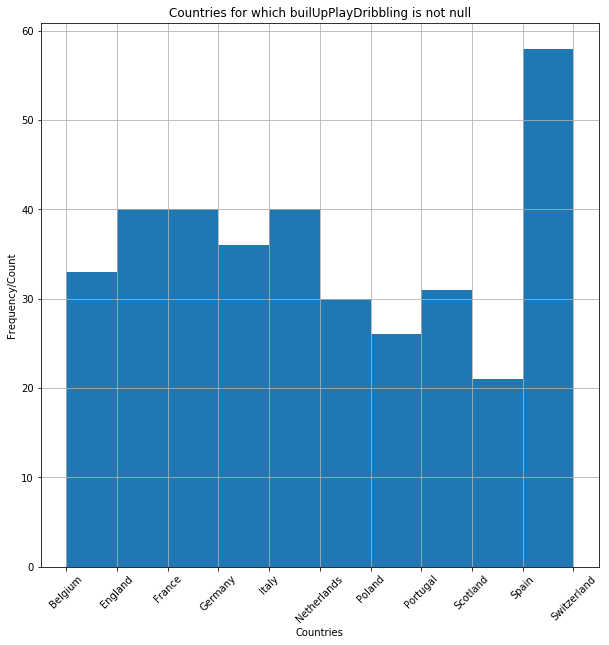

In [26]:
# Plotting histogram for Countries were builUpPlayDribbling is not null

df_attr_final[df_attr_final.buildUpPlayDribbling.notnull()].Country.hist(figsize=(10,10), xrot=45);
plt.title("Countries for which builUpPlayDribbling is not null");
plt.xlabel("Countries");
plt.ylabel("Frequency/Count");

It does seem that all the Leagues do not have this data at some point. So let's see in what Season of play the **buildUpPlayDribbling** might or might not be available.

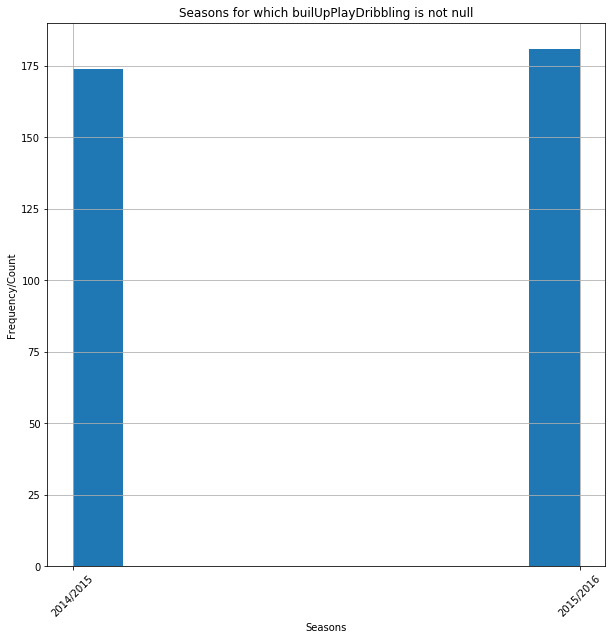

In [27]:
# Plotting histogram for season where builUpPlayDribbling is not null

df_attr_final[df_attr_final.buildUpPlayDribbling.notnull()].season.hist(figsize=(10,10), xrot=45);
plt.title("Seasons for which builUpPlayDribbling is not null");
plt.xlabel("Seasons");
plt.ylabel("Frequency/Count");

Well, based on above histogram one thing is for sure that **buildUpPlayDribbling** is available only for seasons 2014/15 and 2015/16.

Since we do not have enough data to perform operations on, apart from these 2 seasons, we will look forward on cleaning the these values before proceeding to our Research.

While there is so much to talk, there are several topics that draw particular attention.

Topics related to Team stats throughout the available seasons. Questions like, how well was the performance of the League champions? Were those League Champions better than the other Champions?

Or maybe the topics related to the facts of individuals. How well do players across the globe play? Who are the top players? Which player has the best defense or the best attack?

I believe we will firther discuss these points and relate more to what we have determined or correlated so far.

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning

Before we proceed towards our research let's clean the data we first collected and merged in the above cells.
We have several dataframes that need modifications. We'll start with **df_attr_final**

In [28]:
# dropping columns that are no longer needed - id_x, id_y, team_short_name, team_long_name, start_date, 
# buildUpPlayDribbling, buildUpPlayDribblingClass, team_api_id

df_attr_final.drop(['id_x', 'id_y', 'team_short_name', 'team_long_name', 'start_date', 'buildUpPlayDribbling', 'team_api_id'], axis=1, inplace=True)

In [29]:
# Checking structure of df_attr_final - after first clean

df_attr_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1068 entries, 0 to 1067
Data columns (total 27 columns):
Country                           1068 non-null object
League                            1068 non-null object
season                            1068 non-null object
Team_Id                           1068 non-null int64
Team_Name                         1068 non-null object
team_fifa_api_id                  1068 non-null int64
date                              1068 non-null object
buildUpPlaySpeed                  1068 non-null int64
buildUpPlaySpeedClass             1068 non-null object
buildUpPlayDribblingClass         1068 non-null object
buildUpPlayPassing                1068 non-null int64
buildUpPlayPassingClass           1068 non-null object
buildUpPlayPositioningClass       1068 non-null object
chanceCreationPassing             1068 non-null int64
chanceCreationPassingClass        1068 non-null object
chanceCreationCrossing            1068 non-null int64
chanceCreationCross

In [30]:
# Displaying a few columns

df_attr_final.head(10)

,Country,League,season,Team_Id,Team_Name,team_fifa_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribblingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,Belgium,Belgium Jupiler League,2010/2011,9997,Sint-Truidense VV,680,2010-02-22 00:00:00,50,Balanced,Little,...,50,Normal,Organised,50,Medium,50,Press,50,Normal,Cover
1,Belgium,Belgium Jupiler League,2010/2011,8571,KV Kortrijk,100081,2010-02-22 00:00:00,50,Balanced,Little,...,50,Normal,Organised,60,Medium,60,Press,65,Normal,Cover
2,Belgium,Belgium Jupiler League,2010/2011,8203,KV Mechelen,110724,2010-02-22 00:00:00,65,Balanced,Little,...,50,Normal,Organised,60,Medium,70,Double,60,Normal,Cover
3,Belgium,Belgium Jupiler League,2010/2011,10001,KVC Westerlo,681,2010-02-22 00:00:00,45,Balanced,Little,...,55,Normal,Organised,70,High,70,Double,70,Wide,Cover
4,Belgium,Belgium Jupiler League,2010/2011,8635,RSC Anderlecht,229,2010-02-22 00:00:00,50,Balanced,Little,...,60,Normal,Organised,70,High,50,Press,70,Wide,Cover
5,Belgium,Belgium Jupiler League,2010/2011,9985,Standard de Liège,232,2010-02-22 00:00:00,53,Balanced,Little,...,65,Normal,Organised,70,High,70,Double,65,Normal,Cover
6,Belgium,Belgium Jupiler League,2010/2011,9984,KSV Cercle Brugge,1750,2010-02-22 00:00:00,45,Balanced,Little,...,55,Normal,Organised,65,Medium,60,Press,70,Wide,Cover
7,Belgium,Belgium Jupiler League,2010/2011,9987,KRC Genk,673,2010-02-22 00:00:00,45,Balanced,Little,...,60,Normal,Organised,70,High,65,Press,70,Wide,Cover
8,Belgium,Belgium Jupiler League,2010/2011,8342,Club Brugge KV,231,2010-02-22 00:00:00,35,Balanced,Little,...,45,Normal,Organised,60,Medium,70,Double,70,Wide,Cover
9,Belgium,Belgium Jupiler League,2010/2011,9994,Sporting Lokeren,2007,2010-02-22 00:00:00,60,Balanced,Little,...,50,Normal,Organised,65,Medium,65,Press,70,Wide,Cover


Now let's proceed with **df_player_attr**. Now this dataframe lacks several inputs. However, *attacking_work_rate* counts for the most of team. We will proceed with eliminating all the rows associated with null values of *attacking_work_rate*

In [31]:
# Dropping attacking_work_rate and vision from df_player_attr

df_player_attr.dropna(subset=['attacking_work_rate'], how='all', inplace=True)
df_player_attr.dropna(subset=['vision'], how='all', inplace=True)
df_player_attr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180354 entries, 0 to 183928
Data columns (total 46 columns):
player_name            180354 non-null object
birthday               180354 non-null object
height                 180354 non-null float64
weight                 180354 non-null int64
id                     180354 non-null int64
player_fifa_api_id     180354 non-null int64
player_api_id          180354 non-null int64
date                   180354 non-null object
overall_rating         180354 non-null float64
potential              180354 non-null float64
preferred_foot         180354 non-null object
attacking_work_rate    180354 non-null object
defensive_work_rate    180354 non-null object
crossing               180354 non-null float64
finishing              180354 non-null float64
heading_accuracy       180354 non-null float64
short_passing          180354 non-null float64
volleys                180354 non-null float64
dribbling              180354 non-null float64
curve     

In [32]:
# Displaying top 10 rows of df_player_attr to verify the correctness of our immediate previous operation
df_player_attr.head(10)

,player_name,birthday,height,weight,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
5,Aaron Cresswell,1989-12-15 00:00:00,170.18,146,6,189615,155782,2016-04-21 00:00:00,74.0,76.0,...,66.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0
6,Aaron Cresswell,1989-12-15 00:00:00,170.18,146,7,189615,155782,2016-04-07 00:00:00,74.0,76.0,...,66.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0
7,Aaron Cresswell,1989-12-15 00:00:00,170.18,146,8,189615,155782,2016-01-07 00:00:00,73.0,75.0,...,65.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0
8,Aaron Cresswell,1989-12-15 00:00:00,170.18,146,9,189615,155782,2015-12-24 00:00:00,73.0,75.0,...,65.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0
9,Aaron Cresswell,1989-12-15 00:00:00,170.18,146,10,189615,155782,2015-12-17 00:00:00,73.0,75.0,...,65.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0


Now let's try and make some changes in **df_match**, the dataframe which contains match wise data

In [33]:
# Displaying top 5 rows of df_match

df_match.head()

,id,Country,League,home_team,away_team,id,country_id,league_id,season,stage,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,Belgium,Belgium Jupiler League,KRC Genk,Beerschot AC,1,1,1,2008/2009,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,1,Belgium,Belgium Jupiler League,SV Zulte-Waregem,Sporting Lokeren,2,1,1,2008/2009,1,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,1,Belgium,Belgium Jupiler League,KSV Cercle Brugge,RSC Anderlecht,3,1,1,2008/2009,1,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,1,Belgium,Belgium Jupiler League,KAA Gent,RAEC Mons,4,1,1,2008/2009,1,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,1,Belgium,Belgium Jupiler League,FCV Dender EH,Standard de Liège,5,1,1,2008/2009,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67


In [34]:
# Retrieving only necessary columns from df_match

df_match = df_match[['Country', "League", 'home_team', 'away_team', 'season', 'stage', 'date', 'match_api_id', 
                     'home_team_goal', 'away_team_goal', 'goal', 'shoton', 'shotoff', 
                             'foulcommit', 'card', 'cross', 'corner', 'possession', 'B365H', 'B365D', 'B365A', 'BWH',
                             'BWD', 'BWA', 'IWH', 'IWD', 'IWA', 'LBH', 'LBD', 'LBA', 'PSH', 'PSD', 'PSA', 'WHH', 'WHD',
                             'WHA', 'SJH', 'SJD', 'SJA', 'VCH', 'VCD', 'VCA', 'GBH', 'GBD', 'GBA', 'BSH', 'BSD', 'BSA']]

# Checking structure of df_match post cleaning

df_match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Data columns (total 48 columns):
Country           25979 non-null object
League            25979 non-null object
home_team         25979 non-null object
away_team         25979 non-null object
season            25979 non-null object
stage             25979 non-null int64
date              25979 non-null object
match_api_id      25979 non-null int64
home_team_goal    25979 non-null int64
away_team_goal    25979 non-null int64
goal              14217 non-null object
shoton            14217 non-null object
shotoff           14217 non-null object
foulcommit        14217 non-null object
card              14217 non-null object
cross             14217 non-null object
corner            14217 non-null object
possession        14217 non-null object
B365H             22592 non-null float64
B365D             22592 non-null float64
B365A             22592 non-null float64
BWH               22575 non-null float64
BWD        

We do not have a lot of data for several prediction sites. Let's see if can handle these as well.

In [35]:
# Checking what Countries have at least some data from Pinnacle betting site

df_match[df_match.PSH.notnull()].Country.unique()

array(['Belgium', 'England', 'France', 'Germany', 'Italy', 'Netherlands',
       'Portugal', 'Scotland', 'Spain'], dtype=object)

PS's odds are available for all the countries and simultaneously every league as well. Let's see the seasons it is available for.

In [36]:
# Checking Country as well as Season, if they have at least some data from Pinnacle betting site

(df_match[df_match.PSH.notnull()].Country + " : " + df_match[df_match.PSH.notnull()].season).unique()

array(['Belgium : 2012/2013', 'Belgium : 2014/2015', 'Belgium : 2015/2016',
       'England : 2012/2013', 'England : 2013/2014', 'England : 2014/2015',
       'England : 2015/2016', 'France : 2012/2013', 'France : 2013/2014',
       'France : 2014/2015', 'France : 2015/2016', 'Germany : 2012/2013',
       'Germany : 2013/2014', 'Germany : 2014/2015', 'Germany : 2015/2016',
       'Italy : 2012/2013', 'Italy : 2013/2014', 'Italy : 2014/2015',
       'Italy : 2015/2016', 'Netherlands : 2012/2013',
       'Netherlands : 2013/2014', 'Netherlands : 2014/2015',
       'Netherlands : 2015/2016', 'Portugal : 2012/2013',
       'Portugal : 2013/2014', 'Portugal : 2014/2015',
       'Portugal : 2015/2016', 'Scotland : 2012/2013',
       'Scotland : 2013/2014', 'Scotland : 2014/2015',
       'Scotland : 2015/2016', 'Spain : 2012/2013', 'Spain : 2013/2014',
       'Spain : 2014/2015', 'Spain : 2015/2016'], dtype=object)

We notice that while PS (Pinnacle) has data for every League, it does not have data for all the seasons required. We'll check the same for others as well and see how much they lack too.

In [37]:
# Checking the same operation above for Gamebookers

(df_match[df_match.GBH.notnull()].Country + " : " + df_match[df_match.GBH.notnull()].season).unique()

array(['Belgium : 2008/2009', 'Belgium : 2009/2010', 'Belgium : 2010/2011',
       'Belgium : 2011/2012', 'Belgium : 2012/2013', 'England : 2008/2009',
       'England : 2009/2010', 'England : 2010/2011', 'England : 2011/2012',
       'England : 2012/2013', 'France : 2008/2009', 'France : 2009/2010',
       'France : 2010/2011', 'France : 2011/2012', 'France : 2012/2013',
       'Germany : 2008/2009', 'Germany : 2009/2010', 'Germany : 2010/2011',
       'Germany : 2011/2012', 'Germany : 2012/2013', 'Italy : 2008/2009',
       'Italy : 2009/2010', 'Italy : 2010/2011', 'Italy : 2011/2012',
       'Italy : 2012/2013', 'Netherlands : 2008/2009',
       'Netherlands : 2009/2010', 'Netherlands : 2010/2011',
       'Netherlands : 2011/2012', 'Netherlands : 2012/2013',
       'Portugal : 2008/2009', 'Portugal : 2009/2010',
       'Portugal : 2010/2011', 'Portugal : 2011/2012',
       'Portugal : 2012/2013', 'Scotland : 2008/2009',
       'Scotland : 2009/2010', 'Scotland : 2010/2011',
       '

Gamebookers (GB) do have odds for several years but only until the season 2012/2013.

Seeing such pattern we can assume that Bet365 is so far the most reliable source. So, I choose to go ahead with Bet365 odds. I will create a new dataframe, **df_match_pred**, which I will use entirely for match predictions.

In [38]:
# Cleaning df_match and retrieving necessary columns and then loading it into df_match_pred

df_match_pred = df_match[['Country', "League", 'season', 'stage', 'date', 'match_api_id', 'home_team', 
                             'away_team', 'home_team_goal', 'away_team_goal','B365H', 'B365D', 'B365A']]

In [39]:
# Checking the structure of newly created df_match_pred

df_match_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Data columns (total 13 columns):
Country           25979 non-null object
League            25979 non-null object
season            25979 non-null object
stage             25979 non-null int64
date              25979 non-null object
match_api_id      25979 non-null int64
home_team         25979 non-null object
away_team         25979 non-null object
home_team_goal    25979 non-null int64
away_team_goal    25979 non-null int64
B365H             22592 non-null float64
B365D             22592 non-null float64
B365A             22592 non-null float64
dtypes: float64(3), int64(4), object(6)
memory usage: 2.6+ MB


In [40]:
# Verifying availability of data of Bet365 Betting site for Country and Season

(df_match_pred[df_match_pred.B365H.isnull()].Country + " : " + df_match_pred[df_match_pred.B365H.isnull()].season).unique()

array(['Belgium : 2008/2009', 'Belgium : 2011/2012', 'Belgium : 2012/2013',
       'Belgium : 2013/2014', 'France : 2008/2009', 'France : 2009/2010',
       'France : 2010/2011', 'France : 2015/2016', 'Germany : 2012/2013',
       'Italy : 2009/2010', 'Italy : 2010/2011', 'Italy : 2011/2012',
       'Italy : 2012/2013', 'Netherlands : 2008/2009',
       'Netherlands : 2009/2010', 'Netherlands : 2012/2013',
       'Poland : 2008/2009', 'Poland : 2009/2010', 'Poland : 2010/2011',
       'Poland : 2011/2012', 'Poland : 2012/2013', 'Poland : 2013/2014',
       'Poland : 2014/2015', 'Poland : 2015/2016', 'Portugal : 2008/2009',
       'Portugal : 2009/2010', 'Portugal : 2010/2011',
       'Portugal : 2011/2012', 'Portugal : 2013/2014',
       'Portugal : 2014/2015', 'Spain : 2008/2009',
       'Switzerland : 2008/2009', 'Switzerland : 2009/2010',
       'Switzerland : 2010/2011', 'Switzerland : 2011/2012',
       'Switzerland : 2012/2013', 'Switzerland : 2013/2014',
       'Switzerland : 20

In [41]:
# Confirming the teams for which Bet365 data is unavailable

arr = set(df_match_pred[df_match_pred.B365H.isnull()].home_team.unique())
arr2 = set(df_match_pred[df_match_pred.B365H.isnull()].away_team.unique())
arr = arr.union(arr2)
len(arr)

84

This means Bet365 does not have data for 84 teams throughtout the available dataset.

In [42]:
# Saving previous set as a DataFrame in df_teams_Bet365

df_teams_Bet365 = pd.DataFrame()
df_teams_Bet365['team_api_id'] = list(arr)

In [43]:
# Merging df_team_attr and df_teams_Bet365

pd.merge(df_teams_Bet365, df_team_attr, left_on='team_api_id', right_on='Team_Id', how='inner').Team_Name.unique()

array([], dtype=object)

Let's proceed ahead with **df_teams_Bet365** now that we know that we can rely on it (amongst the others)

In [44]:
# Dropping rows and columns with null values

df_match_pred.dropna()

,Country,League,season,stage,date,match_api_id,home_team,away_team,home_team_goal,away_team_goal,B365H,B365D,B365A
0,Belgium,Belgium Jupiler League,2008/2009,1,2008-08-17 00:00:00,492473,KRC Genk,Beerschot AC,1,1,1.73,3.40,5.00
1,Belgium,Belgium Jupiler League,2008/2009,1,2008-08-16 00:00:00,492474,SV Zulte-Waregem,Sporting Lokeren,0,0,1.95,3.20,3.60
2,Belgium,Belgium Jupiler League,2008/2009,1,2008-08-16 00:00:00,492475,KSV Cercle Brugge,RSC Anderlecht,0,3,2.38,3.30,2.75
3,Belgium,Belgium Jupiler League,2008/2009,1,2008-08-17 00:00:00,492476,KAA Gent,RAEC Mons,5,0,1.44,3.75,7.50
4,Belgium,Belgium Jupiler League,2008/2009,1,2008-08-16 00:00:00,492477,FCV Dender EH,Standard de Liège,1,3,5.00,3.50,1.65
5,Belgium,Belgium Jupiler League,2008/2009,1,2008-09-24 00:00:00,492478,KV Mechelen,Club Brugge KV,1,1,4.75,3.40,1.67
6,Belgium,Belgium Jupiler League,2008/2009,1,2008-08-16 00:00:00,492479,KSV Roeselare,KV Kortrijk,2,2,2.10,3.20,3.30
7,Belgium,Belgium Jupiler League,2008/2009,1,2008-08-16 00:00:00,492480,Tubize,Royal Excel Mouscron,1,2,3.20,3.40,2.20
8,Belgium,Belgium Jupiler League,2008/2009,1,2008-08-16 00:00:00,492481,KVC Westerlo,Sporting Charleroi,1,0,2.25,3.25,2.88
9,Belgium,Belgium Jupiler League,2008/2009,10,2008-11-01 00:00:00,492564,Club Brugge KV,KV Kortrijk,4,1,1.30,5.25,9.50


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 : Who are the Top 20 Players across all the Leagues? Who is the fastest Player? Is the fastest player among the top 20 players? Who is the youngest Player to be featured in Top 20?Also, find the player with highest individual rating of single stats (like, free kick accuracy, header accuracy, etc)

On analyzing the data we see that the data available for players is different (or maybe similar) for different dates which is Date of Match. For the above question we will analyze the most recent data which exists for the season 2015/16

On reviewing the data, **2015-12-17** was the most recent Match Date for the person with the highest potential.

In [45]:
# Arranging columns based on overall_rating and date

df_player_attr.sort_values(['overall_rating', 'date'], ascending=[False, False])[df_player_attr.date == '2015-12-17 00:00:00']

C:\Users\kunal\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


,player_name,birthday,height,weight,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
102482,Lionel Messi,1987-06-24 00:00:00,170.18,159,102483,158023,30981,2015-12-17 00:00:00,94.0,94.0,...,90.0,74.0,13.0,23.0,21.0,6.0,11.0,15.0,14.0,8.0
174245,Toni Kroos,1990-01-04 00:00:00,182.88,172,174295,182521,95078,2015-12-17 00:00:00,87.0,90.0,...,88.0,73.0,60.0,72.0,59.0,10.0,11.0,13.0,7.0,10.0
118875,Mats Hummels,1988-12-16 00:00:00,190.50,203,118876,178603,36388,2015-12-17 00:00:00,86.0,87.0,...,79.0,68.0,86.0,87.0,86.0,15.0,6.0,10.0,5.0,6.0
65777,Gonzalo Higuain,1987-12-10 00:00:00,182.88,181,65778,167664,25759,2015-12-17 00:00:00,84.0,84.0,...,70.0,74.0,12.0,22.0,18.0,5.0,12.0,7.0,5.0,10.0
97611,Konstantinos Manolas,1991-06-14 00:00:00,187.96,183,97612,192774,161683,2015-12-17 00:00:00,83.0,86.0,...,22.0,26.0,88.0,86.0,87.0,8.0,6.0,8.0,15.0,12.0
132781,Nicolas Gaitan,1988-02-23 00:00:00,172.72,150,132807,184144,164031,2015-12-17 00:00:00,83.0,84.0,...,85.0,71.0,30.0,42.0,43.0,8.0,11.0,9.0,7.0,5.0
179217,Wesley Sneijder,1984-06-09 00:00:00,170.18,159,179267,139869,30878,2015-12-17 00:00:00,83.0,83.0,...,85.0,76.0,37.0,44.0,40.0,9.0,5.0,13.0,11.0,12.0
85487,Jonas,1984-04-01 00:00:00,180.34,165,85488,176769,39122,2015-12-17 00:00:00,82.0,82.0,...,81.0,78.0,16.0,29.0,28.0,12.0,11.0,7.0,8.0,5.0
130143,Nani,1986-11-17 00:00:00,175.26,146,130169,139068,40945,2015-12-17 00:00:00,82.0,82.0,...,82.0,72.0,15.0,22.0,20.0,5.0,10.0,13.0,6.0,6.0
179944,Willian,1988-08-09 00:00:00,175.26,165,179994,180403,94086,2015-12-17 00:00:00,82.0,83.0,...,80.0,60.0,43.0,62.0,51.0,14.0,12.0,13.0,7.0,13.0


Now the result available to us is for 367 players whose Data was collected on 2015-12-17. The problem with this data is that not every player would have had a match on that day. We will need to refine our search parameters. Let's see what are the most recent dates rather than searching for only one.

In [46]:
# Verifying of the previous result

df_player_attr.sort_values(['date'], ascending=[False]).date.unique()

array(['2016-07-07 00:00:00', '2016-06-30 00:00:00', '2016-06-23 00:00:00',
       '2016-06-16 00:00:00', '2016-06-09 00:00:00', '2016-06-02 00:00:00',
       '2016-05-26 00:00:00', '2016-05-19 00:00:00', '2016-05-12 00:00:00',
       '2016-05-05 00:00:00', '2016-04-28 00:00:00', '2016-04-21 00:00:00',
       '2016-04-14 00:00:00', '2016-04-07 00:00:00', '2016-03-31 00:00:00',
       '2016-03-24 00:00:00', '2016-03-17 00:00:00', '2016-03-10 00:00:00',
       '2016-03-03 00:00:00', '2016-02-25 00:00:00', '2016-02-19 00:00:00',
       '2016-02-18 00:00:00', '2016-02-13 00:00:00', '2016-02-11 00:00:00',
       '2016-02-04 00:00:00', '2016-01-28 00:00:00', '2016-01-21 00:00:00',
       '2016-01-14 00:00:00', '2016-01-07 00:00:00', '2015-12-30 00:00:00',
       '2015-12-24 00:00:00', '2015-12-17 00:00:00', '2015-12-10 00:00:00',
       '2015-12-03 00:00:00', '2015-11-26 00:00:00', '2015-11-19 00:00:00',
       '2015-11-12 00:00:00', '2015-11-06 00:00:00', '2015-10-30 00:00:00',
       '2015

Based on this result my earlier premise and identifier was wrong. There are several dates on which the data was collected. Using only one would mean we are limiting our search to only those players who played on a single day.

First, let's check how many total players do we have.

In [47]:
# Number of player across the dataset

len(df_player_attr.player_api_id.unique())

10410

We have data for 10410 different players. Now we have seen that the most recent date for data was in year 2016. we will see if can cover the maximum number of player we can. It can be possible that a lot of players have retired by this time and thus no stats are available for them any more.

In [48]:
# Number of players across the dataset who played in 2016

len(df_player_attr[df_player_attr.date.str[0:4] == '2016'].player_api_id.unique())

5586

There seems to be a lot less people than the original. Let's see the same for the calendar year 2015.

In [49]:
# Number of players across the dataset who played in 2015

len(df_player_attr[df_player_attr.date.str[0:4] == '2015'].player_api_id.unique())

7502

Although the number of unique players is considerable higher than before we are still not sure that this could be the maximum. I do not wish to go before the year 2015 i.e. 2014 and less because the data would become too old for the most recent ones. There is one thing that we can possibly do. We can check if there are players whose data was collected only in 2016 and not in 2015. This we can ensure that we can get the data of the maximum possible players.

In [50]:
# Number of players across the dataset who played in 2016 or 2015

len(df_player_attr[(df_player_attr.date.str[0:4] == '2016') | (df_player_attr.date.str[0:4] == '2015')].player_api_id.unique())

7675

In [51]:
# Players who played in either 2016 or 2015

df_player_attr[(df_player_attr.date.str[0:4] == '2016') | (df_player_attr.date.str[0:4] == '2015')].sort_values(['player_api_id', 'overall_rating', 'date'], ascending=[False, False, False])

,player_name,birthday,height,weight,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
8085,Alexandre Azevedo,1997-01-28 00:00:00,175.26,150,8086,234141,750584,2016-05-19 00:00:00,58.0,66.0,...,47.0,52.0,56.0,66.0,62.0,8.0,9.0,13.0,11.0,13.0
147359,Rees Greenwood,1996-01-20 00:00:00,172.72,150,147409,225462,750435,2016-04-14 00:00:00,60.0,74.0,...,58.0,61.0,18.0,19.0,21.0,9.0,10.0,8.0,10.0,11.0
147360,Rees Greenwood,1996-01-20 00:00:00,172.72,150,147410,225462,750435,2016-02-11 00:00:00,56.0,70.0,...,58.0,61.0,18.0,19.0,21.0,9.0,10.0,8.0,10.0,11.0
147361,Rees Greenwood,1996-01-20 00:00:00,172.72,150,147411,225462,750435,2016-02-04 00:00:00,56.0,70.0,...,58.0,61.0,18.0,19.0,21.0,9.0,10.0,8.0,10.0,11.0
147362,Rees Greenwood,1996-01-20 00:00:00,172.72,150,147412,225462,750435,2015-11-26 00:00:00,56.0,70.0,...,58.0,61.0,18.0,19.0,21.0,9.0,10.0,8.0,10.0,11.0
147363,Rees Greenwood,1996-01-20 00:00:00,172.72,150,147413,225462,750435,2015-02-27 00:00:00,56.0,70.0,...,58.0,61.0,18.0,19.0,21.0,9.0,10.0,8.0,10.0,11.0
147364,Rees Greenwood,1996-01-20 00:00:00,172.72,150,147414,225462,750435,2015-02-20 00:00:00,56.0,70.0,...,58.0,61.0,18.0,19.0,21.0,9.0,10.0,8.0,10.0,11.0
147365,Rees Greenwood,1996-01-20 00:00:00,172.72,150,147415,225462,750435,2015-02-06 00:00:00,56.0,70.0,...,58.0,61.0,18.0,19.0,21.0,9.0,10.0,8.0,10.0,11.0
147366,Rees Greenwood,1996-01-20 00:00:00,172.72,150,147416,225462,750435,2015-01-16 00:00:00,56.0,70.0,...,58.0,61.0,18.0,19.0,21.0,9.0,10.0,8.0,10.0,11.0
60179,Fynn Arkenberg,1996-03-04 00:00:00,187.96,176,60180,233969,748432,2016-05-12 00:00:00,58.0,68.0,...,36.0,45.0,63.0,69.0,68.0,8.0,8.0,12.0,12.0,6.0


Now Let's create a separate dataframe that holds the most recent date on which data of every possible player (7675 players) was obtained.

In [52]:
# Adding the players to a new dataframe df_player_attr_date based on the most recent data their data was collected

df_player_attr_date = df_player_attr[(df_player_attr.date.str[0:4] == '2016') | (df_player_attr.date.str[0:4] == '2015')].sort_values(['overall_rating', 'date'], ascending=[False, False]).groupby(['player_api_id']).date.max().to_frame().reset_index()

In [53]:
# Displaying first 5 rows of data

df_player_attr_date.head()

,player_api_id,date
0,2625,2015-01-16 00:00:00
1,2752,2015-10-16 00:00:00
2,2768,2016-03-17 00:00:00
3,2796,2016-01-21 00:00:00
4,2802,2015-11-19 00:00:00


In [54]:
# Checking the structure of df_player_attr_date

df_player_attr_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7675 entries, 0 to 7674
Data columns (total 2 columns):
player_api_id    7675 non-null int64
date             7675 non-null object
dtypes: int64(1), object(1)
memory usage: 120.0+ KB


In [55]:
# Merging df_player_attr and df_player_attr_date based on inner join

df_player_attr_final = pd.merge(df_player_attr, df_player_attr_date, how='inner')

**df_player_attr_final** contains the data of all the players with their attributes. Now let's move forward and get the result for our very first part in the Research question.

In [56]:
# Displaying Top 20 players

df_player_top_20 = df_player_attr_final.sort_values(['overall_rating', 'player_name'], ascending=[False, True]).reset_index()[['player_name', 'birthday', 'height', 'weight', 'overall_rating']].head(20)

df_player_top_20

,player_name,birthday,height,weight,overall_rating
0,Lionel Messi,1987-06-24 00:00:00,170.18,159,94.0
1,Cristiano Ronaldo,1985-02-05 00:00:00,185.42,176,93.0
2,Luis Suarez,1987-01-24 00:00:00,182.88,187,90.0
3,Manuel Neuer,1986-03-27 00:00:00,193.04,203,90.0
4,Neymar,1992-02-05 00:00:00,175.26,150,90.0
5,Arjen Robben,1984-01-23 00:00:00,180.34,176,89.0
6,Zlatan Ibrahimovic,1981-10-03 00:00:00,195.58,209,89.0
7,Andres Iniesta,1984-05-11 00:00:00,170.18,150,88.0
8,Eden Hazard,1991-01-07 00:00:00,172.72,163,88.0
9,Mesut Oezil,1988-10-15 00:00:00,182.88,168,88.0


These are the top 20 players with their latest ratings with respect to the given dataset. Now let's search for the fastest player throughout the leagues.

In [57]:
# Displaying players based on maximum sprint speed

max_speed = df_player_attr_final.sprint_speed.max()

df_player_attr_final.sort_values(['sprint_speed'], ascending=[False])[['player_name', 'birthday', 'height', 'weight', 'overall_rating', 'sprint_speed', 'acceleration']][df_player_attr_final.sprint_speed == max_speed]

C:\Users\kunal\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


,player_name,birthday,height,weight,overall_rating,sprint_speed,acceleration
3512,Jonathan Biabiany,1988-04-28 00:00:00,177.80,161,77.0,96.0,94.0
4911,Mathis Bolly,1990-11-14 00:00:00,185.42,170,67.0,96.0,97.0
7037,Theo Walcott,1989-03-16 00:00:00,175.26,150,81.0,96.0,95.0
5957,Pierre-Emerick Aubameyang,1989-06-18 00:00:00,187.96,176,84.0,96.0,95.0


These are players with highest sprint speed. Though there are 4 players, none of them is actually in Top 20 Players. In fact the person with highest sprint speed and acceleration pair has an overall_rating of just 67. The player with higest speed and in top 20 is **Gareth Bale** with 87 overall_rating and 95 speed_rating.

Now let's find the youngest player in Top 20

In [58]:
# Displaying the youngest player to feature in Top 20

df_player_top_20.sort_values(['birthday'], ascending=[False]).head(1)

,player_name,birthday,height,weight,overall_rating
4,Neymar,1992-02-05 00:00:00,175.26,150,90.0


Neymar is the youngest player to be in Top 20 players. In fact he holds the joint 3rd position at the overall rating of 90!

In [59]:
# Creating df_atrr_stats that contains all the maximum values from each columns/attributes

df_atrr_stats = df_player_attr_final.max(axis=0).to_frame('max_value').reset_index()
# df_atrr_stats

Let's store all the maximum stats in a dictionary so that it would be easy for us to analyze all the top players in that category

In [60]:
# Saving the results of df_atrr_stats in a dictionary - stat_dict, to improve the ease of access

stat_dict = df_atrr_stats.set_index('index')['max_value'].to_dict()

stat_dict

{'acceleration': 97.0,
 'aggression': 94.0,
 'agility': 95.0,
 'attacking_work_rate': 'medium',
 'balance': 96.0,
 'ball_control': 96.0,
 'birthday': '1999-04-24 00:00:00',
 'crossing': 92.0,
 'curve': 92.0,
 'date': '2016-07-07 00:00:00',
 'defensive_work_rate': 'medium',
 'dribbling': 96.0,
 'finishing': 95.0,
 'free_kick_accuracy': 94.0,
 'gk_diving': 88.0,
 'gk_handling': 87.0,
 'gk_kicking': 91.0,
 'gk_positioning': 90.0,
 'gk_reflexes': 90.0,
 'heading_accuracy': 95.0,
 'height': 208.28,
 'id': 183925,
 'interceptions': 93.0,
 'jumping': 95.0,
 'long_passing': 93.0,
 'long_shots': 93.0,
 'marking': 90.0,
 'overall_rating': 94.0,
 'penalties': 96.0,
 'player_api_id': 750584,
 'player_fifa_api_id': 234141,
 'player_name': 'Zoumana Camara',
 'positioning': 94.0,
 'potential': 94.0,
 'preferred_foot': 'right',
 'reactions': 92.0,
 'short_passing': 93.0,
 'shot_power': 95.0,
 'sliding_tackle': 95.0,
 'sprint_speed': 96.0,
 'stamina': 95.0,
 'standing_tackle': 91.0,
 'strength': 96.0,


In [61]:
# Creating a list of all the necessary columns/attributes required

cols_list = ['crossing', 'finishing', 'heading_accuracy', 'short_passing', 'volleys', 'dribbling', 'curve', 
             'free_kick_accuracy', 'long_passing', 'ball_control', 'agility', 'reactions', 'balance', 'shot_power', 
             'jumping', 'stamina', 'strength', 'long_shots', 'aggression', 'interceptions', 'positioning', 'vision', 
             'penalties', 'marking', 'standing_tackle', 'sliding_tackle', 'gk_diving', 'gk_handling', 'gk_kicking', 
             'gk_positioning', 'gk_reflexes']

# Displaying the result in a formatted way

for cols in cols_list:
    print('\033[1m' + "Player(s) with highest rating in " + str(cols) + "\033[0m")
    display(df_player_attr_final.sort_values([cols], ascending=[False])[['player_name', 'birthday', 'height', 'weight', 'overall_rating', cols]][df_player_attr_final[cols] == stat_dict[cols]])
    print("\n")

Player(s) with highest rating in crossing


C:\Users\kunal\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  del sys.path[0]


,player_name,birthday,height,weight,overall_rating,crossing
6178,Ricardo Rodriguez,1992-08-25 00:00:00,180.34,170,82.0,92.0




Player(s) with highest rating in finishing


,player_name,birthday,height,weight,overall_rating,finishing
1391,Cristiano Ronaldo,1985-02-05 00:00:00,185.42,176,93.0,95.0




Player(s) with highest rating in heading_accuracy


,player_name,birthday,height,weight,overall_rating,heading_accuracy
7127,Tim Cahill,1979-12-06 00:00:00,177.80,152,73.0,95.0
678,Aritz Aduriz,1981-02-11 00:00:00,182.88,172,82.0,95.0




Player(s) with highest rating in short_passing


,player_name,birthday,height,weight,overall_rating,short_passing
7524,Xavi Hernandez,1980-01-25 00:00:00,170.18,148,86.0,93.0




Player(s) with highest rating in volleys


,player_name,birthday,height,weight,overall_rating,volleys
7662,Zlatan Ibrahimovic,1981-10-03 00:00:00,195.58,209,89.0,92.0




Player(s) with highest rating in dribbling


,player_name,birthday,height,weight,overall_rating,dribbling
4258,Lionel Messi,1987-06-24 00:00:00,170.18,159,94.0,96.0




Player(s) with highest rating in curve


,player_name,birthday,height,weight,overall_rating,curve
6177,Ricardo Quaresma,1983-09-26 00:00:00,175.26,148,80.0,92.0
514,Andrea Pirlo,1979-05-19 00:00:00,177.80,150,81.0,92.0
2796,Hakan Calhanoglu,1994-02-08 00:00:00,177.80,168,79.0,92.0




Player(s) with highest rating in free_kick_accuracy


,player_name,birthday,height,weight,overall_rating,free_kick_accuracy
2796,Hakan Calhanoglu,1994-02-08 00:00:00,177.8,168,79.0,94.0




Player(s) with highest rating in long_passing


,player_name,birthday,height,weight,overall_rating,long_passing
7517,Xabi Alonso,1981-11-25 00:00:00,182.88,176,84.0,93.0




Player(s) with highest rating in ball_control


,player_name,birthday,height,weight,overall_rating,ball_control
4258,Lionel Messi,1987-06-24 00:00:00,170.18,159,94.0,96.0




Player(s) with highest rating in agility


,player_name,birthday,height,weight,overall_rating,agility
4289,Lorenzo Insigne,1991-06-04 00:00:00,162.56,130,82.0,95.0
7011,Takashi Inui,1988-06-02 00:00:00,170.18,139,74.0,95.0
5023,Maxi Moralez,1987-02-27 00:00:00,160.02,126,76.0,95.0




Player(s) with highest rating in reactions


,player_name,birthday,height,weight,overall_rating,reactions
1391,Cristiano Ronaldo,1985-02-05 00:00:00,185.42,176,93.0,92.0
4258,Lionel Messi,1987-06-24 00:00:00,170.18,159,94.0,92.0




Player(s) with highest rating in balance


,player_name,birthday,height,weight,overall_rating,balance
1801,Diego Buonanotte,1988-04-19 00:00:00,160.02,123,73.0,96.0
2518,Gaetan Krebs,1985-11-18 00:00:00,165.10,139,66.0,96.0




Player(s) with highest rating in shot_power


,player_name,birthday,height,weight,overall_rating,shot_power
6379,Ronny,1986-05-11 00:00:00,175.26,163,72.0,95.0




Player(s) with highest rating in jumping


,player_name,birthday,height,weight,overall_rating,jumping
1296,Claudio Beauvue,1988-04-16 00:00:00,175.26,146,77.0,95.0




Player(s) with highest rating in stamina


,player_name,birthday,height,weight,overall_rating,stamina
1251,Christoph Kramer,1991-02-19 00:00:00,190.5,176,78.0,95.0




Player(s) with highest rating in strength


,player_name,birthday,height,weight,overall_rating,strength
2885,Herold Goulon,1988-06-12 00:00:00,195.58,212,68.0,96.0
1272,Christopher Samba,1984-03-28 00:00:00,193.04,220,77.0,96.0




Player(s) with highest rating in long_shots


,player_name,birthday,height,weight,overall_rating,long_shots
1391,Cristiano Ronaldo,1985-02-05 00:00:00,185.42,176,93.0,93.0




Player(s) with highest rating in aggression


,player_name,birthday,height,weight,overall_rating,aggression
5907,Pepe,1983-02-26 00:00:00,187.96,179,84.0,94.0
3318,Jermaine Jones,1981-11-03 00:00:00,182.88,172,71.0,94.0




Player(s) with highest rating in interceptions


,player_name,birthday,height,weight,overall_rating,interceptions
5940,Philipp Lahm,1983-11-11 00:00:00,170.18,146,87.0,93.0
5391,Naldo,1982-09-10 00:00:00,198.12,196,84.0,93.0




Player(s) with highest rating in positioning


,player_name,birthday,height,weight,overall_rating,positioning
7091,Thomas Mueller,1989-09-13 00:00:00,185.42,165,86.0,94.0




Player(s) with highest rating in vision


,player_name,birthday,height,weight,overall_rating,vision
7524,Xavi Hernandez,1980-01-25 00:00:00,170.18,148,86.0,94.0
514,Andrea Pirlo,1979-05-19 00:00:00,177.80,150,81.0,94.0




Player(s) with highest rating in penalties


,player_name,birthday,height,weight,overall_rating,penalties
6212,Rickie Lambert,1982-02-16 00:00:00,187.96,170,75.0,96.0




Player(s) with highest rating in marking


,player_name,birthday,height,weight,overall_rating,marking
495,Andrea Barzagli,1981-05-08 00:00:00,187.96,192,85.0,90.0
2655,Giorgio Chiellini,1984-08-14 00:00:00,187.96,190,86.0,90.0
7047,Thiago Silva,1984-09-22 00:00:00,182.88,174,88.0,90.0




Player(s) with highest rating in standing_tackle


,player_name,birthday,height,weight,overall_rating,standing_tackle
7047,Thiago Silva,1984-09-22 00:00:00,182.88,174,88.0,91.0




Player(s) with highest rating in sliding_tackle


,player_name,birthday,height,weight,overall_rating,sliding_tackle
5940,Philipp Lahm,1983-11-11 00:00:00,170.18,146,87.0,95.0




Player(s) with highest rating in gk_diving


,player_name,birthday,height,weight,overall_rating,gk_diving
1627,David De Gea,1990-11-07 00:00:00,193.04,181,87.0,88.0
1797,Diego Alves,1985-06-24 00:00:00,187.96,183,82.0,88.0




Player(s) with highest rating in gk_handling


,player_name,birthday,height,weight,overall_rating,gk_handling
4536,Manuel Neuer,1986-03-27 00:00:00,193.04,203,90.0,87.0
7053,Thibaut Courtois,1992-05-11 00:00:00,198.12,194,86.0,87.0




Player(s) with highest rating in gk_kicking


,player_name,birthday,height,weight,overall_rating,gk_kicking
4536,Manuel Neuer,1986-03-27 00:00:00,193.04,203,90.0,91.0




Player(s) with highest rating in gk_positioning


,player_name,birthday,height,weight,overall_rating,gk_positioning
4536,Manuel Neuer,1986-03-27 00:00:00,193.04,203,90.0,90.0




Player(s) with highest rating in gk_reflexes


,player_name,birthday,height,weight,overall_rating,gk_reflexes
4984,Mattia Perin,1992-11-10 00:00:00,187.96,163,81.0,90.0
7376,Vincent Enyeama,1982-08-29 00:00:00,182.88,192,81.0,90.0


We have several columns now that we could see correlation with. I'll start with **height** i.e. I would like to see how does one's height affect the attributes of the players!

In [62]:
# Adding remaining stats to cols_list and saving in cols_list_final - to be used while plotting 

cols_list_final = cols_list
cols_list_final.append('sprint_speed')            
cols_list_final.append('acceleration')
cols_list_final.append('overall_rating')

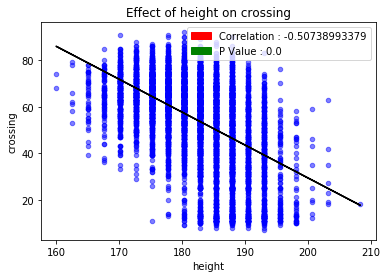

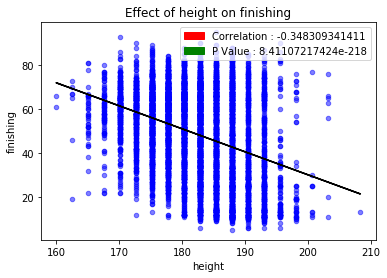

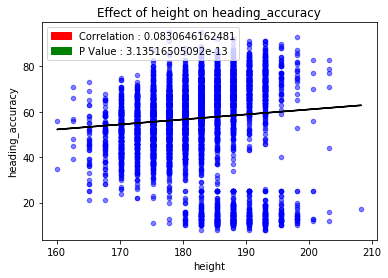

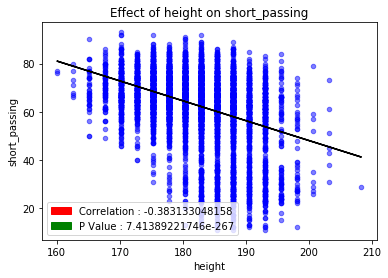

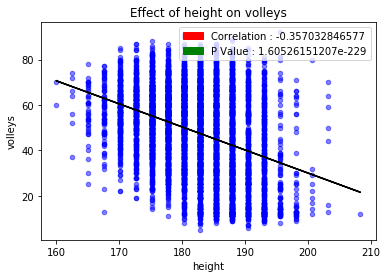

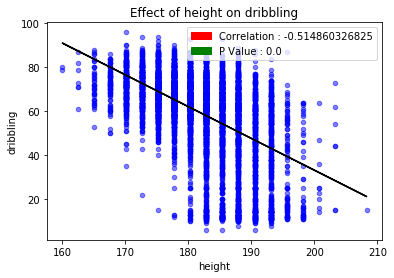

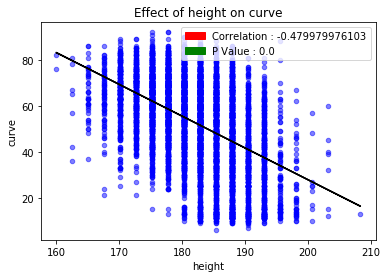

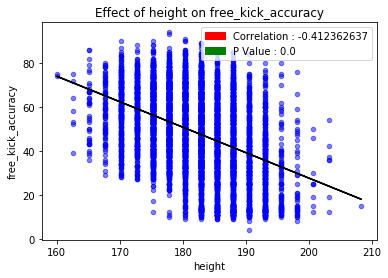

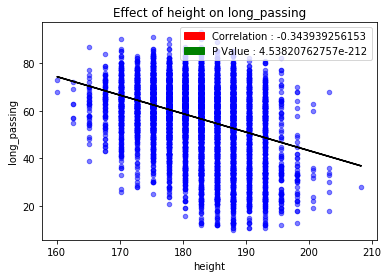

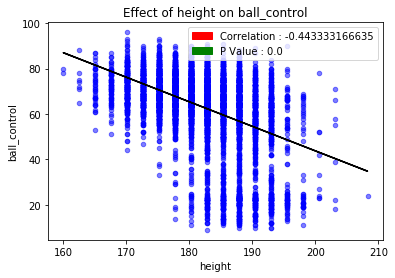

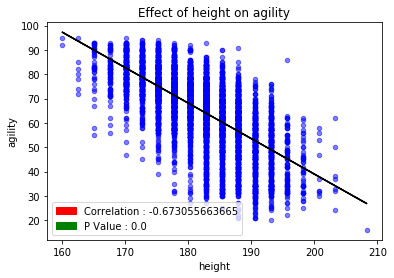

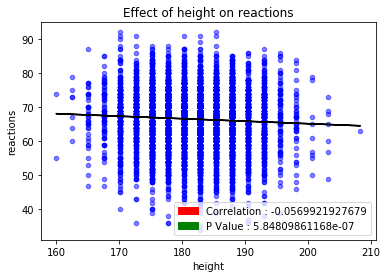

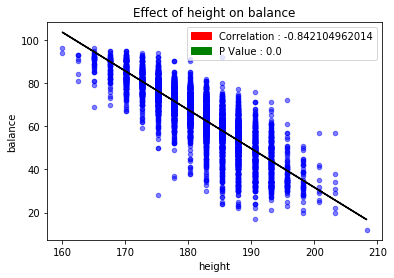

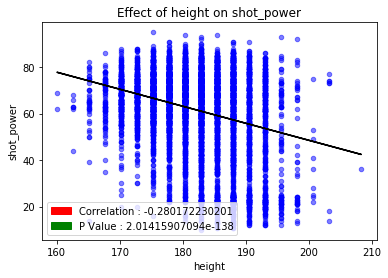

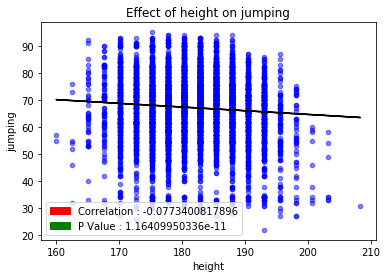

In [63]:
# PLotting scatter plots for first fifteen attributes stored in cols_list_final

# df_player_attr_final.hist(figsize=(20,20));

for cols in cols_list_final[0:15]:
    y, x = df_player_attr_final[cols], df_player_attr_final.height
    mask = ~np.isnan(x) & ~np.isnan(y)
    slope, intercept, r_value, p_value, std_err = stats.linregress(x[mask], y[mask])
    line = slope*x+intercept
    #plt.plot(x, y, 'o', x, line, color='Black', lw='1')    
    corr = "Correlation : " + str(r_value)
    p_val = "P Value : " + str(p_value)
    corr_patch = mpatches.Patch(label=corr, color='RED')
    p_val_patch = mpatches.Patch(label=p_val, color='GREEN')
    title = str("Effect of height on " + cols)
    axes = df_player_attr_final.plot(kind='scatter', x='height', y=cols, alpha=0.5, color='BLUE', title=title)    
    plt.legend(handles=[corr_patch, p_val_patch]);
    plt.plot(x, line, color='BLACK');

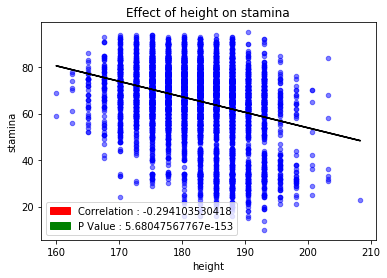

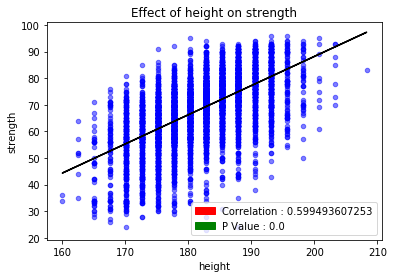

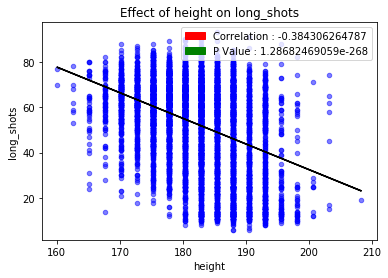

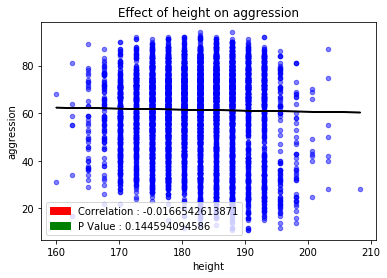

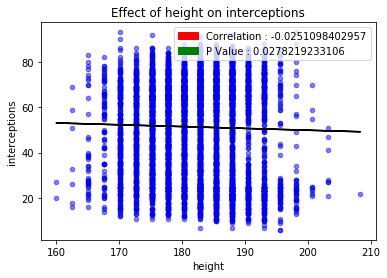

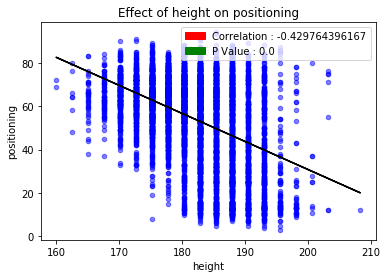

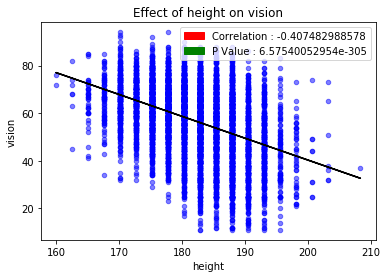

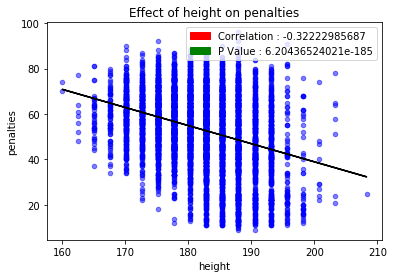

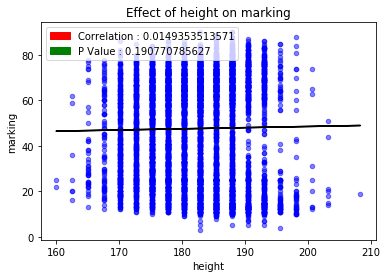

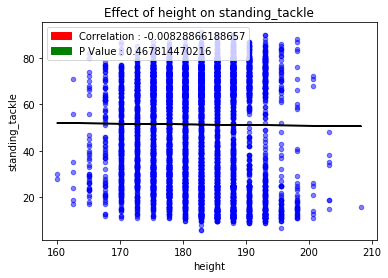

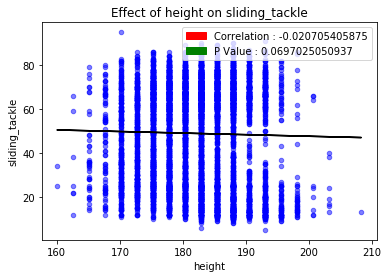

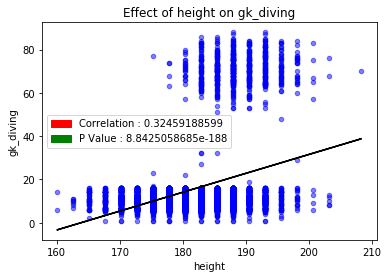

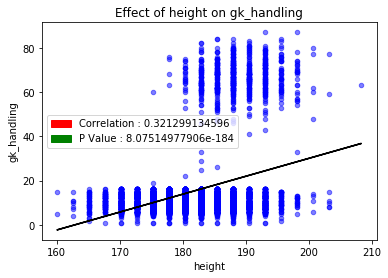

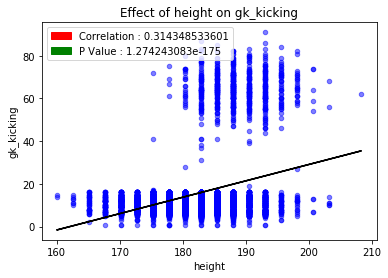

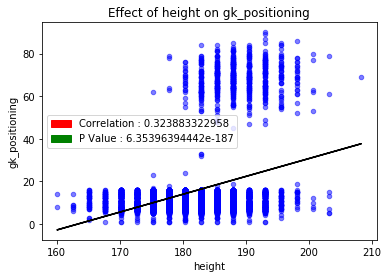

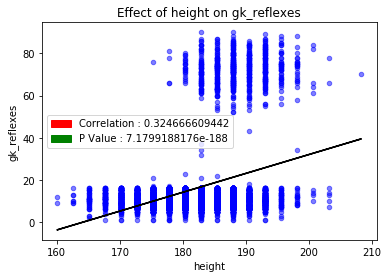

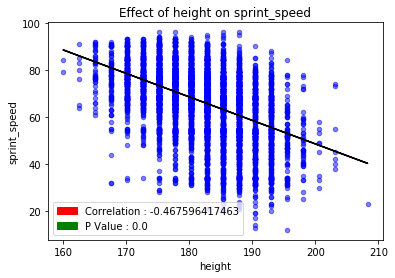

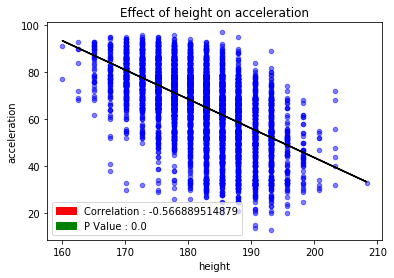

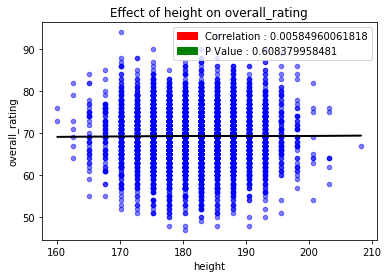

In [64]:
# Plotting scatter plots for the remaining attributes (after first 15) stored in cols_list_final

for cols in cols_list_final[15:]:
    y, x = df_player_attr_final[cols], df_player_attr_final.height
    mask = ~np.isnan(x) & ~np.isnan(y)
    slope, intercept, r_value, p_value, std_err = stats.linregress(x[mask], y[mask])
    line = slope*x+intercept
    #plt.plot(x, y, 'o', x, line, color='Black', lw='1')    
    corr = "Correlation : " + str(r_value)
    p_val = "P Value : " + str(p_value)
    corr_patch = mpatches.Patch(label=corr, color='RED')
    p_val_patch = mpatches.Patch(label=p_val, color='GREEN')
    
    title = str("Effect of height on " + cols)
    df_player_attr_final.plot(kind='scatter', x='height', y=cols, alpha=0.5, color='BLUE', title=title)
    
    plt.legend(handles=[corr_patch, p_val_patch]);
    plt.plot(x, line, color='BLACK');

On calculating t-value from <a href='https://www.danielsoper.com/statcalc/calculator.aspx?id=10'>this</a> source, it turns out that for a value of 7674 (*degrees of freedom*) we obtain a t-value of **+/- 1.96027320** for a paired t-test.

I, in general, assume that there is no affect of height on other attributes. I'll consider this as my null hypothesis. While my alternative hypothesis would be that height affects other attributes.

On seeing the p-values of different, none of them falls in the extreme range. We fail to reject the null hypothesis or we retain the null hypothesis. Thus we can say that height in general does not affect other attributes of a player.

Let's now proceed to our next Research Question.


### Research Question 2  - Which League is the most Predictable (based on Bet365 odds)?

To go ahead with this Research Question we will use our already cleaned dataframe **df_match_pred**

In [65]:
# Dropping all the null values across rows and columns in df_match_pred

df_match_pred.dropna(inplace=True)

C:\Users\kunal\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Let us first convert odds into predictions. The probability we get from odds is obtained by inversing the odds i.e. **1/odds**. We can also use **100/odds** to get a percentage but here I will stick to probability.

In [66]:
# Function to convert odds into prediction probability.

def match_pred(row):
    """
    Function to convert odds into prediction probability.
    """
    odds = [row['B365H'],row['B365D'],row['B365A']]    

    probs = [1/o for o in odds]

    return (probs)

df_match_pred['probability'] = df_match_pred.apply(match_pred, axis=1)

C:\Users\kunal\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


In [67]:
# Displaying last 5 rows of df_match_pred

df_match_pred.tail()

,Country,League,season,stage,date,match_api_id,home_team,away_team,home_team_goal,away_team_goal,B365H,B365D,B365A,probability
24552,Spain,Spain LIGA BBVA,2015/2016,9,2015-10-25 00:00:00,2030167,Atlético Madrid,Valencia CF,2,1,1.57,3.80,6.50,"[0.6369426751592356, 0.2631578947368421, 0.153..."
24553,Spain,Spain LIGA BBVA,2015/2016,9,2015-10-24 00:00:00,2030168,Málaga CF,RC Deportivo de La Coruña,2,0,2.25,3.25,3.40,"[0.4444444444444444, 0.3076923076923077, 0.294..."
24554,Spain,Spain LIGA BBVA,2015/2016,9,2015-10-26 00:00:00,2030169,Athletic Club de Bilbao,Real Sporting de Gijón,3,0,1.53,4.00,7.00,"[0.6535947712418301, 0.25, 0.14285714285714285]"
24555,Spain,Spain LIGA BBVA,2015/2016,9,2015-10-24 00:00:00,2030170,Granada CF,Real Betis Balompié,1,1,2.30,3.25,3.25,"[0.4347826086956522, 0.3076923076923077, 0.307..."
24556,Spain,Spain LIGA BBVA,2015/2016,9,2015-10-23 00:00:00,2030171,Rayo Vallecano,RCD Espanyol,3,0,2.20,3.40,3.20,"[0.45454545454545453, 0.29411764705882354, 0.3..."


Now let's segregate the predictions into **Home Win**, **Draw** and **Away Win**. This way can remove the probability column as well as the prediction odds. 

In [68]:
# Displays results of prediction by converting probability into result

def prediction(row):
    """
        Displays results of prediction by converting probability into result
    """
    max_pred = max(row['probability'])
    if row['probability'][0] == max_pred:
        return "Home Win"
    elif row['probability'][1] == max_pred:
        return "Draw"
    elif row['probability'][2] == max_pred:
        return "Away Win"        

In [69]:
# Applying the 'prediction' function to df_match_pred and saving it into 'prediction' column

df_match_pred['prediction'] = df_match_pred.apply(prediction, axis=1)

C:\Users\kunal\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [70]:
# Displaying the first 5 rows of df_match_pred to ensure that our function was applied correctly

df_match_pred.head()

,Country,League,season,stage,date,match_api_id,home_team,away_team,home_team_goal,away_team_goal,B365H,B365D,B365A,probability,prediction
0,Belgium,Belgium Jupiler League,2008/2009,1,2008-08-17 00:00:00,492473,KRC Genk,Beerschot AC,1,1,1.73,3.40,5.00,"[0.5780346820809249, 0.29411764705882354, 0.2]",Home Win
1,Belgium,Belgium Jupiler League,2008/2009,1,2008-08-16 00:00:00,492474,SV Zulte-Waregem,Sporting Lokeren,0,0,1.95,3.20,3.60,"[0.5128205128205129, 0.3125, 0.2777777777777778]",Home Win
2,Belgium,Belgium Jupiler League,2008/2009,1,2008-08-16 00:00:00,492475,KSV Cercle Brugge,RSC Anderlecht,0,3,2.38,3.30,2.75,"[0.42016806722689076, 0.30303030303030304, 0.3...",Home Win
3,Belgium,Belgium Jupiler League,2008/2009,1,2008-08-17 00:00:00,492476,KAA Gent,RAEC Mons,5,0,1.44,3.75,7.50,"[0.6944444444444444, 0.26666666666666666, 0.13...",Home Win
4,Belgium,Belgium Jupiler League,2008/2009,1,2008-08-16 00:00:00,492477,FCV Dender EH,Standard de Liège,1,3,5.00,3.50,1.65,"[0.2, 0.2857142857142857, 0.6060606060606061]",Away Win


Just like predictions, we will add a new column **result** which contains the actual results of the match. We can thus, compare the result woth prediction and check how well does this betting/prediction site, **Bet365**, performs in the same operation.

In [71]:
# Returns actual result of the game based on goals scored in the match on either side (Home or Away)

def result(row):
    """
        Returns actual result of the game based on goals scored in the match on either side (Home or Away)
    """
    home_goal = row['home_team_goal']
    away_goal = row['away_team_goal']
    if(home_goal > away_goal):
        return "Home Win"
    elif(home_goal < away_goal):
        return "Away Win"
    else:
        return "Draw"    

In [72]:
# Applying the 'result' function to df_match_pred and storing the result in 'result' column

df_match_pred['result'] = df_match_pred.apply(result, axis=1)

C:\Users\kunal\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [73]:
# Displaying the first 5 rows of df_match_pred to ensure that our function was applied correctly

df_match_pred.head()

,Country,League,season,stage,date,match_api_id,home_team,away_team,home_team_goal,away_team_goal,B365H,B365D,B365A,probability,prediction,result
0,Belgium,Belgium Jupiler League,2008/2009,1,2008-08-17 00:00:00,492473,KRC Genk,Beerschot AC,1,1,1.73,3.40,5.00,"[0.5780346820809249, 0.29411764705882354, 0.2]",Home Win,Draw
1,Belgium,Belgium Jupiler League,2008/2009,1,2008-08-16 00:00:00,492474,SV Zulte-Waregem,Sporting Lokeren,0,0,1.95,3.20,3.60,"[0.5128205128205129, 0.3125, 0.2777777777777778]",Home Win,Draw
2,Belgium,Belgium Jupiler League,2008/2009,1,2008-08-16 00:00:00,492475,KSV Cercle Brugge,RSC Anderlecht,0,3,2.38,3.30,2.75,"[0.42016806722689076, 0.30303030303030304, 0.3...",Home Win,Away Win
3,Belgium,Belgium Jupiler League,2008/2009,1,2008-08-17 00:00:00,492476,KAA Gent,RAEC Mons,5,0,1.44,3.75,7.50,"[0.6944444444444444, 0.26666666666666666, 0.13...",Home Win,Home Win
4,Belgium,Belgium Jupiler League,2008/2009,1,2008-08-16 00:00:00,492477,FCV Dender EH,Standard de Liège,1,3,5.00,3.50,1.65,"[0.2, 0.2857142857142857, 0.6060606060606061]",Away Win,Away Win


I will now clean the data and add/remove any necessary columns

In [74]:
# Dropping home_team_goal, away_team_goal, B365H, B365D, B365A, probability from df_match_pred

df_match_pred.drop(['home_team_goal', 'away_team_goal', 'B365H', 'B365D', 'B365A', 'probability'], inplace=True, axis=1)

C:\Users\kunal\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [75]:
# Displaying top 5 rows from df_match_pred to check the result of previous operation

df_match_pred.head()

,Country,League,season,stage,date,match_api_id,home_team,away_team,prediction,result
0,Belgium,Belgium Jupiler League,2008/2009,1,2008-08-17 00:00:00,492473,KRC Genk,Beerschot AC,Home Win,Draw
1,Belgium,Belgium Jupiler League,2008/2009,1,2008-08-16 00:00:00,492474,SV Zulte-Waregem,Sporting Lokeren,Home Win,Draw
2,Belgium,Belgium Jupiler League,2008/2009,1,2008-08-16 00:00:00,492475,KSV Cercle Brugge,RSC Anderlecht,Home Win,Away Win
3,Belgium,Belgium Jupiler League,2008/2009,1,2008-08-17 00:00:00,492476,KAA Gent,RAEC Mons,Home Win,Home Win
4,Belgium,Belgium Jupiler League,2008/2009,1,2008-08-16 00:00:00,492477,FCV Dender EH,Standard de Liège,Away Win,Away Win


To make the job easy, I will addd a new column **result_count** which contains binary values. **1** for true i.e. the predicted result was same as the actual result and **0**, otherwise.

In [76]:
# result_count function - Returns 1 for correct prediction and 0, otherwise

def result_count(row):
    """
        Returns 1 for correct prediction and 0, otherwise
    """
    if row['prediction'] == row['result']:
        return 1
    else:
        return 0

In [77]:
# Applying the 'result_count' function to df_match_pred and storing the result in 'result_count' column

df_match_pred['result_count'] = df_match_pred.apply(result_count, axis=1)

C:\Users\kunal\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [78]:
# Displaying the first 5 rows of df_match_pred just to verify the correctness of our previous function

df_match_pred.head()

,Country,League,season,stage,date,match_api_id,home_team,away_team,prediction,result,result_count
0,Belgium,Belgium Jupiler League,2008/2009,1,2008-08-17 00:00:00,492473,KRC Genk,Beerschot AC,Home Win,Draw,0
1,Belgium,Belgium Jupiler League,2008/2009,1,2008-08-16 00:00:00,492474,SV Zulte-Waregem,Sporting Lokeren,Home Win,Draw,0
2,Belgium,Belgium Jupiler League,2008/2009,1,2008-08-16 00:00:00,492475,KSV Cercle Brugge,RSC Anderlecht,Home Win,Away Win,0
3,Belgium,Belgium Jupiler League,2008/2009,1,2008-08-17 00:00:00,492476,KAA Gent,RAEC Mons,Home Win,Home Win,1
4,Belgium,Belgium Jupiler League,2008/2009,1,2008-08-16 00:00:00,492477,FCV Dender EH,Standard de Liège,Away Win,Away Win,1


In [79]:
# Storing final result in dff_match_pred_final

df_match_pred_final = df_match_pred.groupby(['Country', 'season']).result_count.mean().to_frame().reset_index()

**df_match_pred_final** contains the result of what we needed.

In [80]:
# Displaying the result

df_match_pred_final

,Country,season,result_count
0,Belgium,2008/2009,0.537954
1,Belgium,2009/2010,0.538095
2,Belgium,2010/2011,0.537500
3,Belgium,2011/2012,0.558824
4,Belgium,2012/2013,0.485106
5,Belgium,2014/2015,0.520833
6,Belgium,2015/2016,0.520833
7,England,2008/2009,0.539474
8,England,2009/2010,0.555263
9,England,2010/2011,0.507895


The rows looks fine but let's see if we can make it better. 

I would reindex the same and shift rows and columns simultaneously.

In [81]:
# Rearranging df_match_pred_final to improve the view and make it easy for plot comparison

df_match_pred_final = df_match_pred_final.reset_index().pivot(index='season', columns='Country', values='result_count')

In [82]:
# Displaying rearranged dataframe - df_match_pred_final

df_match_pred_final

Country,Belgium,England,France,Germany,Italy,Netherlands,Portugal,Scotland,Spain
season,,,,,,,,,
2008/2009,0.537954,0.539474,0.496042,0.532680,0.557895,0.540984,0.571429,0.491228,0.564644
2009/2010,0.538095,0.555263,0.506596,0.496732,0.556728,0.639344,0.527197,0.500000,0.584211
2010/2011,0.537500,0.507895,0.448549,0.483660,0.533156,0.581699,0.518828,0.565789,0.610526
2011/2012,0.558824,0.521053,0.513158,0.509804,0.509804,0.594771,0.584034,0.526316,0.536842
2012/2013,0.485106,0.531579,0.515789,0.498361,0.554090,0.501639,0.550000,0.416667,0.547368
2013/2014,NaN,0.600000,0.523684,0.552288,0.571053,0.490196,0.543933,0.557018,0.539474
2014/2015,0.520833,0.536842,0.544737,0.513072,0.469657,0.545752,0.544262,0.539474,0.568421
2015/2016,0.520833,0.473684,0.493404,0.532680,0.534211,0.552288,0.555556,0.464912,0.547368


Here we have it. The final table. We will now construct a plot to compare the several results at a time.

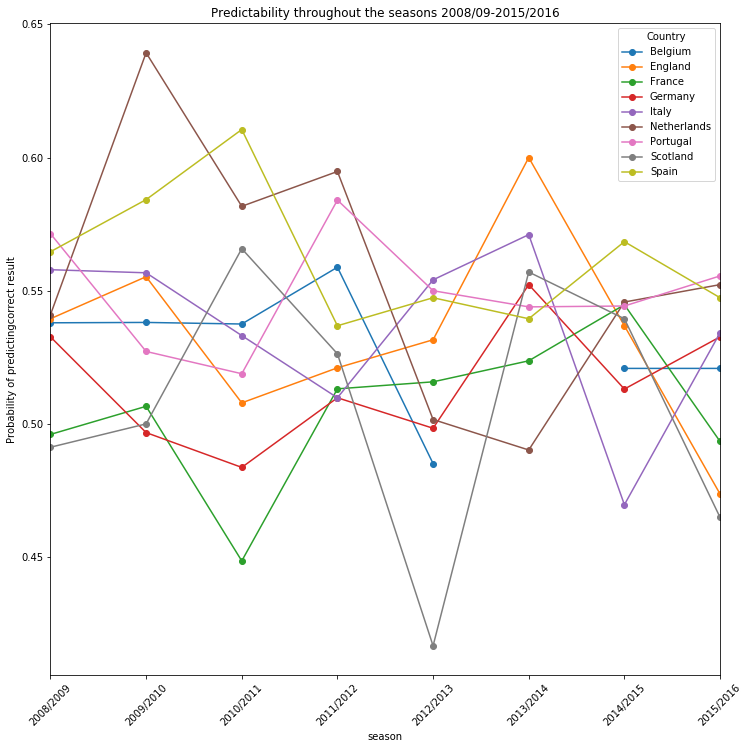

In [83]:
# Plotting line graph to compare probabilitied of correct prediction for every League/Country

df_match_pred_final.plot(marker='o', figsize=(12,12));
plt.xticks(rotation=45)
plt.ylabel("Probability of predictingcorrect result");
plt.title("Predictability throughout the seasons 2008/09-2015/2016");

We can see that there is not clear prediction statistic. Rather, the predict varies heavily. Although on a general note we can say that Netherlands had the most predictable season in 2009/2010 while Scotland had the least predictable season in 2012/2013.

Spain's La Liga hass been fairly predictable or rather constant at prediction rate while England's Premier League saw a steap dip after the year 2013/2014.

Scotland on the other hand has been fairly less predictable that the other leagues.

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!

After seeing these results we can make a fair set of conclusions or result. Though none of them is a perfect or even near perfect causation.

<ul>
<li>On analysing the attributes of players most of the top players do not have at least one attribute that is better than all the other players. Rather, players with overall_rating as low as 74 have shown better results in terms of outclassing others in a single attribute.</li>
<li>The Youngest player in the top 20 players is at the joint 3rd position.</li>
<li>Based on our Hypothesis there is no clear relation between height of a player and his other attributes. (*Based on paired 2 tailed t-test*) Rather the attributes are heavily dispersed (*based on scatter plots*).</li>
<li>Prediction odds, as it seems, are slightly reliable. On average they produce correct results more than half of the time. Although this in itself can't be a metric for perfect result, only Bet365 (according to this dataset) has proved to be better.</li>
</ul>

## Limitations

Despite our result based on graphs/plots and statistical analysis, the outcome is not fool proof. Following are a few points depicting where the result lacks or might not be perfect.

<ul>
<li>Although the data for player's attributes is obtained from verified sources, it does not have complete set of attributes for every player. The attributes of those players were based on what FIFA determined. However, this does not mean that their data is absolutely correct. There are a lot players whose data is too less to even make a comparision with others. 

It seems that Players from Top 5 leagues (England, Spain, Germany, France and Italy) tend to have better collection of stats than others. There is a very heavy chance that many players were left out due to this bias.</li>
<li>We analysed the attributes of those player who played in 2015/2016 and considered their latest rating. This means that a lot of players who retired just the previous season were left. This missed the chance of having a better rate of comparison.</li>
<li>Predictability of Leagues was based on the fact how many correct predictions were made against the actual results. We considered only Bet365, since we it had the maximum data available against any other betting/prediction site. It does not mean that Bet365 is the best site. I have, thus, limited myself with the assumption that Bet365 is the best for the scenario. It could be highly possible that other sites provide better results/odds/predictions</li>
</ul>

### Sources and References

<ul>
<li>Udacity's Machine Learning Foundation Nano Degree courseware</li>
<li>https://pandas.pydata.org/pandas-docs/stable/merging.html</li>

<li>https://stackoverflow.com/questions/30780742/get-substring-from-pandas-dataframe-while-filtering</li>

<li>https://stackoverflow.com/questions/10373660/converting-a-pandas-groupby-object-to-dataframe</li>

<li>https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.to_frame.html</li>

<li>https://stackoverflow.com/questions/8924173/how-do-i-print-bold-text-in-python</li>

<li>https://stackoverflow.com/questions/13643363/linear-regression-of-arrays-containing-nans-in-python-numpy</li>

<li>https://stackoverflow.com/questions/19124601/is-there-a-way-to-pretty-print-the-entire-pandas-series-dataframe</li>

<li>https://nycdatascience.com/blog/student-works/r-shiny/soccer-betting-analysis-use-betting-agencies-odds-predict-match-results/</li>
</ul>